# **Análise de dados com R**: Trabalho 1

<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

**Prof. Ricardo Carubbi**<br>
Atualizado em 03/06/2023

G2 -  San tiago, Daniel Ricarte, Jean Diniz , Gilmar

## 1 Entrega do trabalho T1
- 16/06/23 (sexta-feira 19hs as 22hs)

`Obs1. Nota composta pela média ponderada do resultado, legibilidade do código e organização do notebbok.`</br>
`Obs2. Apresentação de uma conclusão sobre a correlação de Peason do PESO e QI nos grupos de tratamento.`

## 2 Bibliotecas

In [2]:
library(ggplot2)

## 3 Funções

In [3]:
# Função para criar uma nova coluna:

makeFactor <- function(df, col, breaks, labels) {

    stopifnot(is.numeric(df[,col]))

    vFactor <- cut(
        df[,col],
        breaks = breaks,
        labels = labels,
        include.lowest = T
    )

    return(vFactor)
}

## 4 Objetivo
O objetivo deste trabalho é realizar uma análise das variáveis de estudo por grupo de caso e controle como também determinar se o tratamento IHPD está associado ao aumento do desenvolvimento cognitivo e comportamental de crianças prematuras de baixo peso para os diversos estratos da população de interesse.

## 5 Dataset

**Programa de Saúde e Desenvolvimento Infantil (IHPD)**

**Descrição**</br>
O Programa de Saúde e Desenvolvimento Infantil (IHPD) é um ensaio clínico randomizado para testar a eficácia dos serviços de apoio educativo, familiar e acompanhamento pediátrico, oferecido durante os primeiros 3 anos de vida aos recém-nascidos de baixo peso (menos de 2500 gramas). A intervenção do IHPD foi implementada na década de 1980 e visava reduzir o atraso de desenvolvimento cognitivo e comportamental de crianças prematuras de baixo peso em oito locais clínicos[1]. Os recém-nascidos foram divididos em dois grupos: grupo caso e grupo controle. O grupo caso receberá a intervenção do IHPD e o grupo controle receberá o tratamento padrão pediátrico retirado de uma pesquisa chamada Pesquisa Nacional da Juventude, realizada durante o mesmo período do IHPD.

**Formato**</br>
Dataframe com 4381 observações (linhas) e 15 variáveis (colunas).

`idade`(int): Idade da mãe.</br>
`etnia`(fct): Tipo de etnia.</br>
`edu`(fct): Nível de educação.</br>
`trab`(fct): Indicação de trabalho durante a gravidez.</br>
`prenatal`(fct): Indicação de realização de prenatal.</br>
`cigarro`(fct): Indicação de uso de cigarro durante a gravidez.</br>
`alcool`(fct): Indicação de uso de álcool durante a gravidez.</br>
`genero`(fct): Tipo de gênero do filho.</br>
`primog`(fct): Indicação de primogênito.</br>
`peso`(int): Peso em gramas.</br>
`premat`(int): Número de semanas de prematuridade.</br>
`hosp`(int): Número de semanas de hospitalização.</br>
`renda`(int): Renda familiar anual após o nascimento.</br>
`trt`(fct): Indicação de tratamento familiar pelo IHPD ou tratamento padrão.</br>
`QI`(int): Teste de QI aos 3 anos de idade.</br>

**Categorização das variáveis contínuas**

- `Idade`: Idade da mãe abaixo ou igual a 20 anos, considerada `jovem` e acima, `adulta`.
- `Peso`: Peso do recém-nascido abaixo ou igual a 2500 gramas, considerado `baixo` e acima, `normal`.
- `Prematuridade`: A OMS considera a prematuridade acima de 9 semanas, `extrema`, entre 9 e 6 semanas, `alta`, entre 6 a 1 semana, `moderada` e nenhuma prematuridade como `ausente`.
- `Hospitalização`: Adote os intervalos de hospitalização em até 2 semanas, `baixa`, de 2 a 4 semanas, `média`, acima de 4 semanas `alta` e nenhuma hospitalização como `ausente`.
- `Renda`: Adote as faixas de renda anual em até 50.000, `baixa`, de 50.0000 a 150.000, `média`, acima de 150.000 como `alta`.
- `QI`: A classificação simplificada Stanford-Binet considera que o Q.I. acima de 110 indica inteligência superior ou `alta`, entre 90 a 110, inteligência normal ou `média`, abaixo de 90, debilidade mental ou `baixa`.

**Fonte**:
- Programa de Desenvolvimento e Saúde Infantil (IHPD) desenvolvido pelo Departamento de Pediatria da Universidade de Stanford na California.

**Referência**</br>
- Brooks-Gunn, J., Liaw, F. R., and Klebanov, P. K. (1992). Effects of   early intervention on cognitive function of low birth weight preterm
  infants. Journal of Pediatrics 120, 350–359.
- Hill, J. L., Brooks-Gunn, J., and Waldfogel, J. (2003). Sustained effects of high participation in an early intervention for low-birth-weight premature infants. Developmental Psychology 39, 730–744.

## 6 Carregamento do dados.

In [4]:
# Download de arquivos do Google Drive.
# ID: 1U1eVN0vvRBLHA1dXnjfBdfvGPB8jdyk_

system('gdown --id 1U1eVN0vvRBLHA1dXnjfBdfvGPB8jdyk_')


In [5]:
# Carrega o arquivos 'csv' separados por ';' e variáveis (colunas) do tipo "character"
#?read.csv
IHDP <- read.csv('/content/ihdp.csv', sep = ';', colClasses = 'character')

In [6]:
# Retorna os primeiros elementos de um vetor, matriz, tabela ou dataframe.

head(IHDP)

,idade,etnia,edu,trab,prenatal,cigarro,alcool,genero,primog,peso,premat,hosp,renda,trt,QI
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,33,branca,superior,sim,sim,nao,nao,masculino,nao,1559,10,31,42500,caso,111
2,22,negra,medio_incompleto,nao,sim,nao,sim,masculino,nao,2240,3,4,5000,caso,81
3,13,negra,medio_incompleto,nao,sim,nao,nao,masculino,sim,1900,6,9,12500,caso,92
4,25,negra,superior,sim,sim,nao,nao,masculino,sim,1550,8,50,42500,caso,103
5,19,negra,medio_incompleto,nao,sim,sim,nao,masculino,nao,2270,5,4,5000,caso,81
6,19,negra,medio,sim,sim,sim,sim,feminino,sim,1550,4,13,12500,caso,94


In [7]:
# Exibe as informações básicas e exemplos no dataframe

str(IHDP)

'data.frame':	4381 obs. of  15 variables:
 $ idade   : chr  "33" "22" "13" "25" ...
 $ etnia   : chr  "branca" "negra" "negra" "negra" ...
 $ edu     : chr  "superior" "medio_incompleto" "medio_incompleto" "superior" ...
 $ trab    : chr  "sim" "nao" "nao" "sim" ...
 $ prenatal: chr  "sim" "sim" "sim" "sim" ...
 $ cigarro : chr  "nao" "nao" "nao" "nao" ...
 $ alcool  : chr  "nao" "sim" "nao" "nao" ...
 $ genero  : chr  "masculino" "masculino" "masculino" "masculino" ...
 $ primog  : chr  "nao" "nao" "sim" "sim" ...
 $ peso    : chr  "1559" "2240" "1900" "1550" ...
 $ premat  : chr  "10" "3" "6" "8" ...
 $ hosp    : chr  "31" "4" "9" "50" ...
 $ renda   : chr  "42500" "5000" "12500" "42500" ...
 $ trt     : chr  "caso" "caso" "caso" "caso" ...
 $ QI      : chr  "111" "81" "92" "103" ...


## 7 Preprocessamento

### 7.1 Convenções

In [8]:
# Nome das colunas em maiúsculo com a função toupper.

colnames(IHDP) <- toupper(colnames(IHDP))
colnames(IHDP)

[1] "IDADE"    "ETNIA"    "EDU"      "TRAB"     "PRENATAL" "CIGARRO" 
 [7] "ALCOOL"   "GENERO"   "PRIMOG"   "PESO"     "PREMAT"   "HOSP"    
[13] "RENDA"    "TRT"      "QI"

### 7.2 Tipos de dados

In [9]:
# Conversão das colunas 'idade','peso','premat','hosp','renda' e 'QI'
# para variáveis numéricas e inteiras

#colInt <- c('IDADE','PESO','PREMAT','HOSP','RENDA','QI')

#for (col in colInt) {
    #IHDP[,col] <- as.integer(IHDP[,col])
#}

#ou

colInt <- c('IDADE','PESO','PREMAT','HOSP','RENDA','QI')

IHDP[colInt] <- lapply(IHDP[colInt], as.integer)

str(IHDP)

'data.frame':	4381 obs. of  15 variables:
 $ IDADE   : int  33 22 13 25 19 19 26 20 23 28 ...
 $ ETNIA   : chr  "branca" "negra" "negra" "negra" ...
 $ EDU     : chr  "superior" "medio_incompleto" "medio_incompleto" "superior" ...
 $ TRAB    : chr  "sim" "nao" "nao" "sim" ...
 $ PRENATAL: chr  "sim" "sim" "sim" "sim" ...
 $ CIGARRO : chr  "nao" "nao" "nao" "nao" ...
 $ ALCOOL  : chr  "nao" "sim" "nao" "nao" ...
 $ GENERO  : chr  "masculino" "masculino" "masculino" "masculino" ...
 $ PRIMOG  : chr  "nao" "nao" "sim" "sim" ...
 $ PESO    : int  1559 2240 1900 1550 2270 1550 2330 2410 1776 2140 ...
 $ PREMAT  : int  10 3 6 8 5 4 9 3 6 5 ...
 $ HOSP    : int  31 4 9 50 4 13 8 6 30 2 ...
 $ RENDA   : int  42500 5000 12500 42500 5000 12500 17500 11344 30000 8750 ...
 $ TRT     : chr  "caso" "caso" "caso" "caso" ...
 $ QI      : int  111 81 92 103 81 94 104 82 107 79 ...


In [10]:
# Conversão das colunas restantes do tipo caractere para variáveis categóricas
# conhecidos como fatores no R.

for (col in colnames(IHDP)) {
    if (is.character(IHDP[,col])) {
        IHDP[,col] <- as.factor(IHDP[,col])
    }
}
str(IHDP)

'data.frame':	4381 obs. of  15 variables:
 $ IDADE   : int  33 22 13 25 19 19 26 20 23 28 ...
 $ ETNIA   : Factor w/ 3 levels "branca","hispanica",..: 1 3 3 3 3 3 1 1 1 3 ...
 $ EDU     : Factor w/ 4 levels "medio","medio_incompleto",..: 3 2 2 3 2 1 2 2 1 1 ...
 $ TRAB    : Factor w/ 2 levels "nao","sim": 2 1 1 2 1 2 2 1 2 2 ...
 $ PRENATAL: Factor w/ 2 levels "nao","sim": 2 2 2 2 2 2 2 2 2 2 ...
 $ CIGARRO : Factor w/ 2 levels "nao","sim": 1 1 1 1 2 2 2 2 1 2 ...
 $ ALCOOL  : Factor w/ 2 levels "nao","sim": 1 2 1 1 1 2 1 2 1 1 ...
 $ GENERO  : Factor w/ 2 levels "feminino","masculino": 2 2 2 2 2 1 2 1 1 2 ...
 $ PRIMOG  : Factor w/ 2 levels "nao","sim": 1 1 2 2 1 2 1 1 1 1 ...
 $ PESO    : int  1559 2240 1900 1550 2270 1550 2330 2410 1776 2140 ...
 $ PREMAT  : int  10 3 6 8 5 4 9 3 6 5 ...
 $ HOSP    : int  31 4 9 50 4 13 8 6 30 2 ...
 $ RENDA   : int  42500 5000 12500 42500 5000 12500 17500 11344 30000 8750 ...
 $ TRT     : Factor w/ 2 levels "caso","controle": 1 1 1 1 1 1 1 1 1 1 ..

In [11]:
# Exibindo os níveis (categorias) da coluna (variável) 'GENERO'

levels(IHDP$GENERO)

[1] "feminino"  "masculino"

In [12]:
# Alterando os níveis (categorias) da coluna 'GENERO'

novolevel <- c("fem","masc")

levels(IHDP$GENERO) <- novolevel

levels(IHDP$GENERO)

IHDP$GENERO[1:20]

[1] "fem"  "masc"

[1] masc masc masc masc masc fem  masc fem  fem  masc fem  fem  masc masc fem 
[16] masc fem  masc fem  masc
Levels: fem masc

In [13]:
# Checando por valores NA

colSums(is.na(IHDP))

IDADE    ETNIA      EDU     TRAB PRENATAL  CIGARRO   ALCOOL   GENERO 
       0        0        0        0        0        0        0        0 
  PRIMOG     PESO   PREMAT     HOSP    RENDA      TRT       QI 
       0        0        0        0        0        0        0

## 8 Análise numérica

### 8.2. Divisão entre os grupos de caso e controle
Objetivo:
1. Subdividir o dataframe original em dois novos dataframes correspondentes aos grupo de controle e ao grupo de caso.

In [14]:
# Dataframe de pacientes do grupo de tratamento controle ou grupo controle
# Criar dataframe para o grupo de controle

df_controle <- subset(IHDP, IHDP$TRT == "controle")
head(df_controle)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>
291,19,branca,medio_incompleto,sim,sim,sim,nao,masc,sim,4592,0,8,17000,controle,97
292,22,branca,medio_incompleto,nao,sim,nao,sim,masc,nao,4082,-1,3,9750,controle,99
293,24,branca,medio_incompleto,nao,sim,sim,nao,masc,nao,3175,3,5,30000,controle,94
294,24,branca,medio,sim,sim,nao,sim,masc,nao,4139,1,4,27761,controle,33
295,27,branca,medio_incompleto,sim,sim,sim,sim,masc,nao,3679,1,7,30000,controle,105
296,27,branca,superior,nao,sim,sim,sim,masc,sim,3316,1,63,39902,controle,115


In [15]:
# Dataframe de pacientes do grupo de tratamento caso ou grupo caso
# Criar dataframe para o grupo de tratamento (caso)

df_caso <- subset(IHDP, IHDP$TRT == "caso")
head(df_caso)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94


## 8.3. Análise das variáveis
### Objetivos:

1. **Sumarização das estatíticas básicas** de todos os pacientes, dos pacientes controle e dos pacientes caso.
2. **Defina**, e **comente** as frequências globais e relativas por grupo de controle e caso.
3. **Defina** e **comente** os coeficientes de correlação de Pearson.

### Resumo sobre o coeficiente de Pearson:

- O coeficiente de correlação de $Pearson$ ($r$), ou coeficiente de correlação
produto-momento ou o $r$ de $Pearson$, mede o grau da **correlação linear** entre duas variáveis quantitativas (contínuas ou discretas).

- Este coeficiente adimensional, normalmente representado pela letra "$r$", assume apenas valores entre $-1$ e $1$:
    - **r = 1**: Significa uma correlação linear perfeita e positiva entre as duas variáveis.
    - **r = -1**: Significa uma correlação linear negativa e perfeita entre as duas variáveis Isto é, se uma aumenta, a outra sempre diminui.
    - **r = 0**: Significa que as duas variáveis não dependem linearmente uma da outra. No entanto, pode existir uma outra dependência que seja "não linear". Assim, o resultado $r=0$ deve ser investigado por outros meios (não abordados nesta disciplina).

- Para Cohen (1988), valores entre $0,10$ e $0,29$ podem ser considerados pequenos; entre $0,30$ e $0,49$ podem ser considerados como médios; e valores entre $0,50$ e $1$ podem ser interpretados como grandes. Seja como for, quanto mais perto de $1$ (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

- Faz-se necessário uma **análise de outliers**, pois o coeficiente de correlação é fortemente afetado pela presença deles. A presença de outliers pode comprometer fortemente as estimativas.

- O coeficiente de correlação de Pearson ($r$) é fortemente influenciado pela média da distribuição. Por esse motivo, um dos pressupostos centrais para que essa medida seja adequadamente utilizada é de que as observações obedeçam a uma **distribuição normal**. Existem testes disponíveis para averiguar em que medida as observações estão normalmente distribuídas, sendo a observação gráfica dos dados (gráfico Q-Q e histogramas) um dos procedimentos mais comumente utilizados.

Fontes:</br>
1. COHEN, Jacob. (1988), Statistical power analysis for the behavioral

### 8.3.1 Variável `idade` (G5)

#### A. Estatísticas básicas

#### B. Categorização das variáveis `IDADE`, `PESO` e `QI` conforme 8.1

#### C. Análise univariada das variáveis `IDADE`, `PESO` e `QI`

#### D. Análise bivariada das variáveis `IDADE`, `PESO`

#### E. Análise bivariada das variáveis `IDADE` e `QI`

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães abaixo de 20 anos (`JOVEM`)

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães acima de 20 anos (`ADULTA`)

### 8.3.1 Variável `etnia` (G1)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `ETNIA`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `ETNIA`, `PESO`

#### D. Análise bivariada das variáveis `ETNIA` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato da etnia negra (`NEGRA`)

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães da etnia hispânica (`HISPANICA`)

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães da etnia branca (`BRANCA`)

### 4.3.3. Variável `edu` (G6)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `EDU`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `EDU`, `PESO`

#### D. Análise bivariada das variáveis `EDU` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães com ensino médio incompleto

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com ensino médio

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães com ensino superior incompleto

#### H. Análise da correlação entre `PESO` e `QI` no estrato de mães com ensino superior

### 4.3.4. Variável `trab` (G1)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `TRAB`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `TRAB`, `PESO`

#### D. Análise bivariada das variáveis `TRAB` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães que trabalham

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães que não trabalham

### 4.3.5. Variável `prenatal` (G4)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `PRENATAL`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `PRENATAL`, `PESO`

#### D. Análise bivariada das variáveis `PRENATAL` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães que fizeram prenatal

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães que não fizeram prenatal

### 4.3.6. Variável `cigarro` (G3)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `CIGARRO`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `CIGARRO`, `PESO`

#### D. Análise bivariada das variáveis `CIGARRO` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães fumantes

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães não fumantes

### 4.3.7. Variável `alcool` (G2)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

In [56]:
# Exibe as informações estatísticas básica da variável 'PESO'
summary(IHDP$PESO)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1502    2891    3288    3247    3657    7597 

In [57]:
# Primeiro para tipo caso:
PESOCAT <- makeFactor(
    df_caso,
    'PESO',
    c(-Inf,2500,Inf),
    c("<2500",">2500")
)
df_caso$FPESO <- PESOCAT
head(df_caso)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500


In [58]:
# Agora para tipo controle:
PESOCAT <- makeFactor(
    df_controle,
    'PESO',
    c(-Inf,2500,Inf),
    c("<2500",">2500")
)
df_controle$FPESO <- PESOCAT
head(df_controle)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
291,19,branca,medio_incompleto,sim,sim,sim,nao,masc,sim,4592,0,8,17000,controle,97,>2500
292,22,branca,medio_incompleto,nao,sim,nao,sim,masc,nao,4082,-1,3,9750,controle,99,>2500
293,24,branca,medio_incompleto,nao,sim,sim,nao,masc,nao,3175,3,5,30000,controle,94,>2500
294,24,branca,medio,sim,sim,nao,sim,masc,nao,4139,1,4,27761,controle,33,>2500
295,27,branca,medio_incompleto,sim,sim,sim,sim,masc,nao,3679,1,7,30000,controle,105,>2500
296,27,branca,superior,nao,sim,sim,sim,masc,sim,3316,1,63,39902,controle,115,>2500


In [59]:
# Por fim para a Dataframe original (IHDP)

PESOCAT <- makeFactor(
    IHDP,
    'PESO',
    c(-Inf,2500,Inf),
    c("<2500",">2500")
)
IHDP$FPESO <- PESOCAT
head(IHDP)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500


In [60]:
# Exibe as informações estatísticas básica da variável 'QI'

summary(IHDP$QI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   73.00   88.00   86.34  101.00  129.00 

In [61]:
# Novamento primeiro faremos para tipo Caso:

QICAT <- makeFactor(
    df_caso,
    'QI',
    c(-Inf,90,110,Inf),
    c('baixa','media','alta')
)
df_caso$FQI <- QICAT
head(df_caso)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500,alta
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500,baixa
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500,media
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500,media
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500,baixa
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500,media


In [62]:
# Agora faremos para o tipo Controle:

QICAT <- makeFactor(
    df_controle,
    'QI',
    c(-Inf,90,110,Inf),
    c('baixa','media','alta')
)
df_controle$FQI <- QICAT
head(df_controle)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>
291,19,branca,medio_incompleto,sim,sim,sim,nao,masc,sim,4592,0,8,17000,controle,97,>2500,media
292,22,branca,medio_incompleto,nao,sim,nao,sim,masc,nao,4082,-1,3,9750,controle,99,>2500,media
293,24,branca,medio_incompleto,nao,sim,sim,nao,masc,nao,3175,3,5,30000,controle,94,>2500,media
294,24,branca,medio,sim,sim,nao,sim,masc,nao,4139,1,4,27761,controle,33,>2500,baixa
295,27,branca,medio_incompleto,sim,sim,sim,sim,masc,nao,3679,1,7,30000,controle,105,>2500,media
296,27,branca,superior,nao,sim,sim,sim,masc,sim,3316,1,63,39902,controle,115,>2500,alta


In [63]:
# Por fim para o Dataframe Original (IHDP)

QICAT <- makeFactor(
    IHDP,
    'QI',
    c(-Inf,90,110,Inf),
    c('baixa','media','alta')
)
IHDP$FQI <- QICAT
head(IHDP)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500,alta
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500,baixa
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500,media
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500,media
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500,baixa
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500,media


#### B. Análise univariada das variáveis `ALCOOL`, `PESO` e `QI`

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1502    2891    3288    3247    3657    7597 

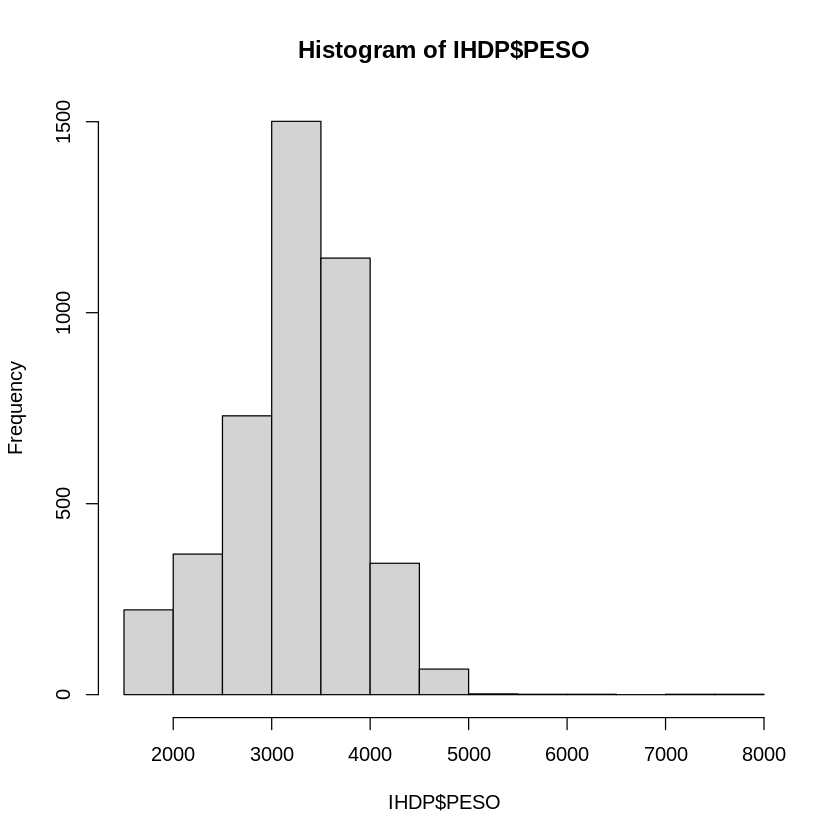

In [64]:
# Variável Peso:

summary(IHDP$PESO)
hist(IHDP$PESO)

Variável PESO p/ grupo Caso: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1515    1780    2000    2009    2240    2500 


Variável PESO p/ grupo Controle: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1502    2976    3345    3335    3685    7597 

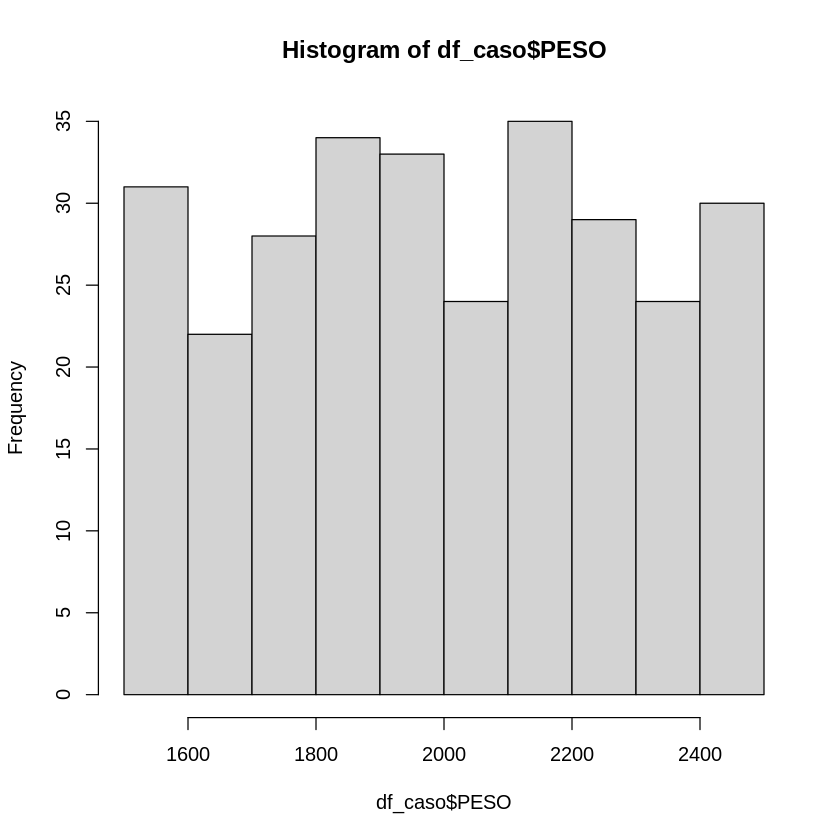

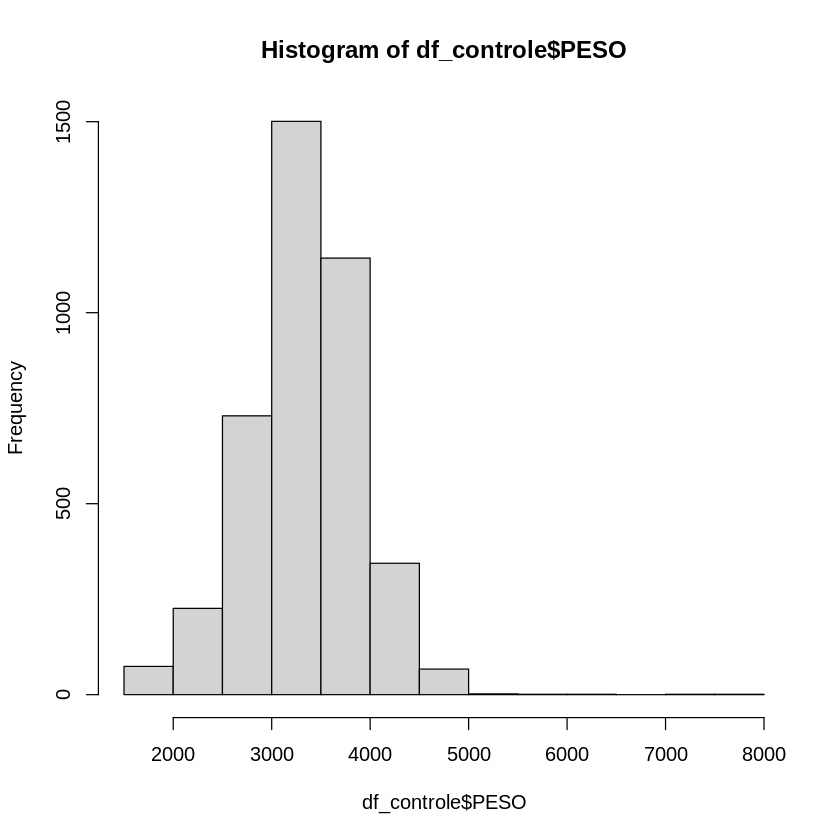

In [65]:
cat("Variável PESO p/ grupo Caso: \n")
summary(df_caso$PESO)
hist(df_caso$PESO)

cat("\nVariável PESO p/ grupo Controle: \n")
summary(df_controle$PESO)
hist(df_controle$PESO)

# Variável tipo Caso possui um distribuição ou frequencia mais homogênea

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   73.00   88.00   86.34  101.00  129.00 

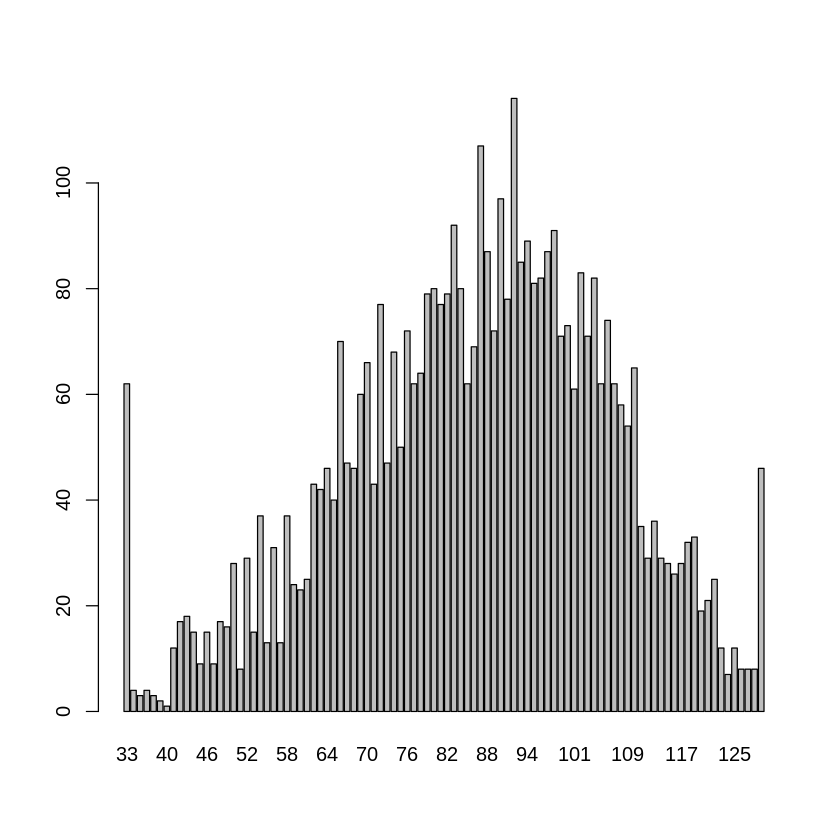

In [66]:
# Variável QI

summary(IHDP$QI)
barplot(table(IHDP$QI))


Variável QI p/ grupo Caso: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   81.00   92.00   92.05  104.00  129.00 


Variável QI p/ grupo Controle: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   72.00   88.00   85.93  101.00  129.00 

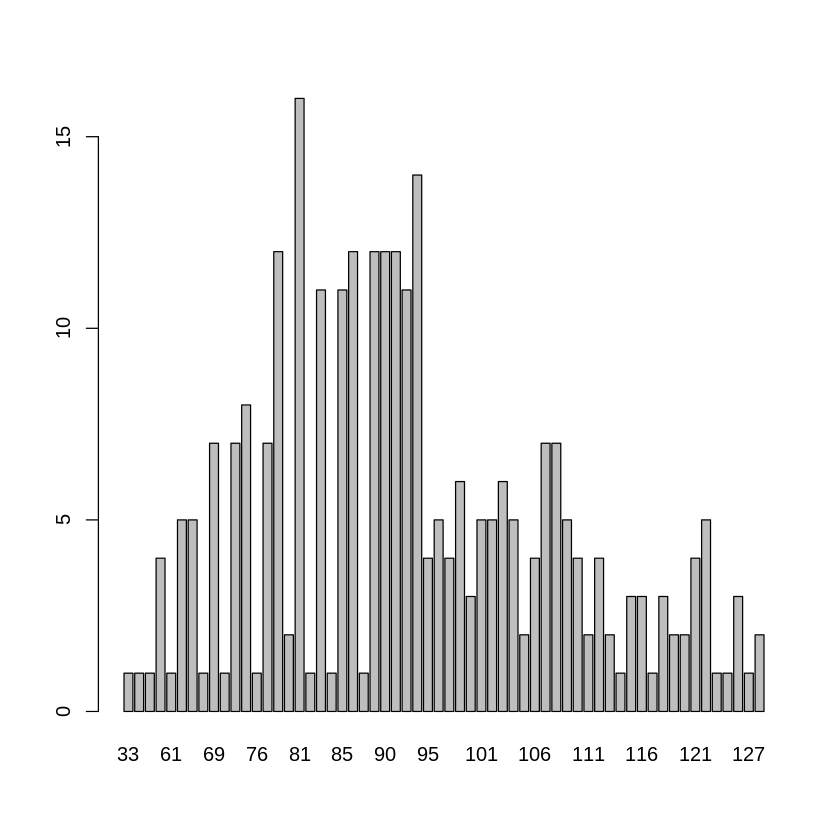

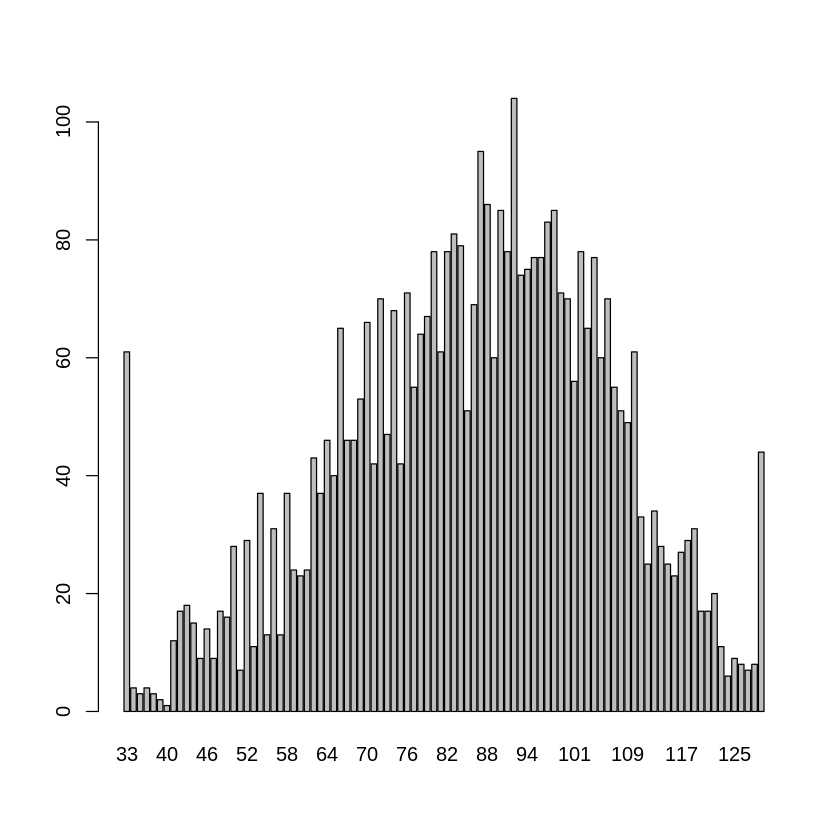

In [67]:
cat("\nVariável QI p/ grupo Caso: \n")
summary(df_caso$QI)
barplot(table(df_caso$QI))

cat("\nVariável QI p/ grupo Controle: \n")
summary(df_controle$QI)
barplot(table(df_controle$QI))

Tabela de frequência absoluta: 



 nao  sim 
1221 3160 


Tabela de frequência relativa (porcentagem)


  nao   sim 
27.87 72.13 

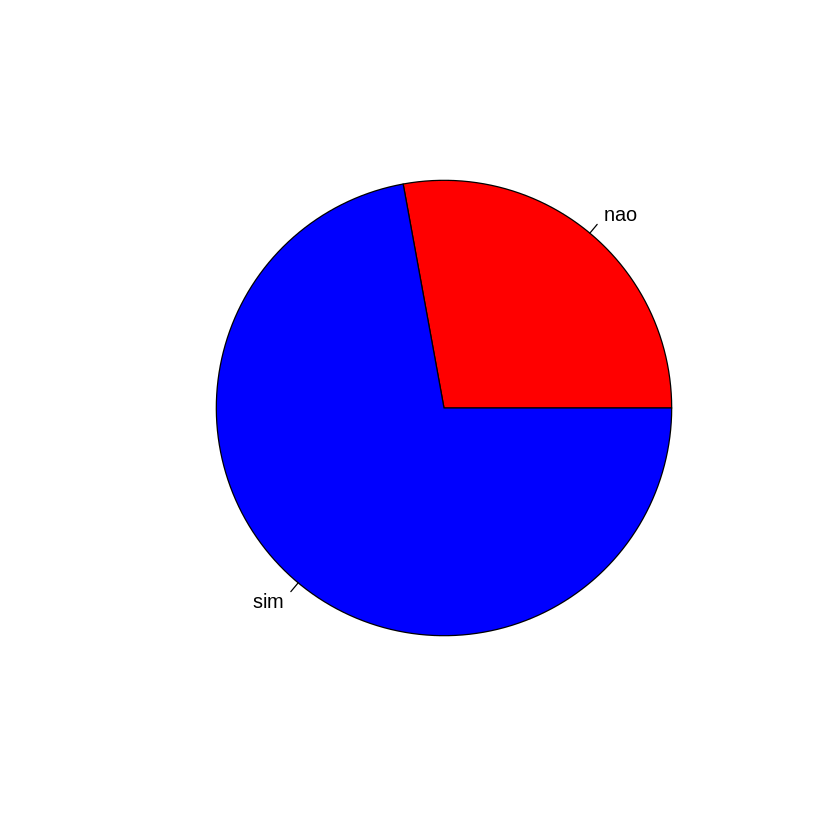

In [68]:
# Variável Alcool p/ Dataframe IHDP:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
table(IHDP$ALCOOL)


# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
round(prop.table(table(IHDP$ALCOOL))*100,2)
pie(table(IHDP$ALCOOL), col=c("red","blue"))


Tabela de frequência absoluta: 



 nao  sim 
 967 3124 


Tabela de frequência relativa (porcentagem)


  nao   sim 
23.64 76.36 

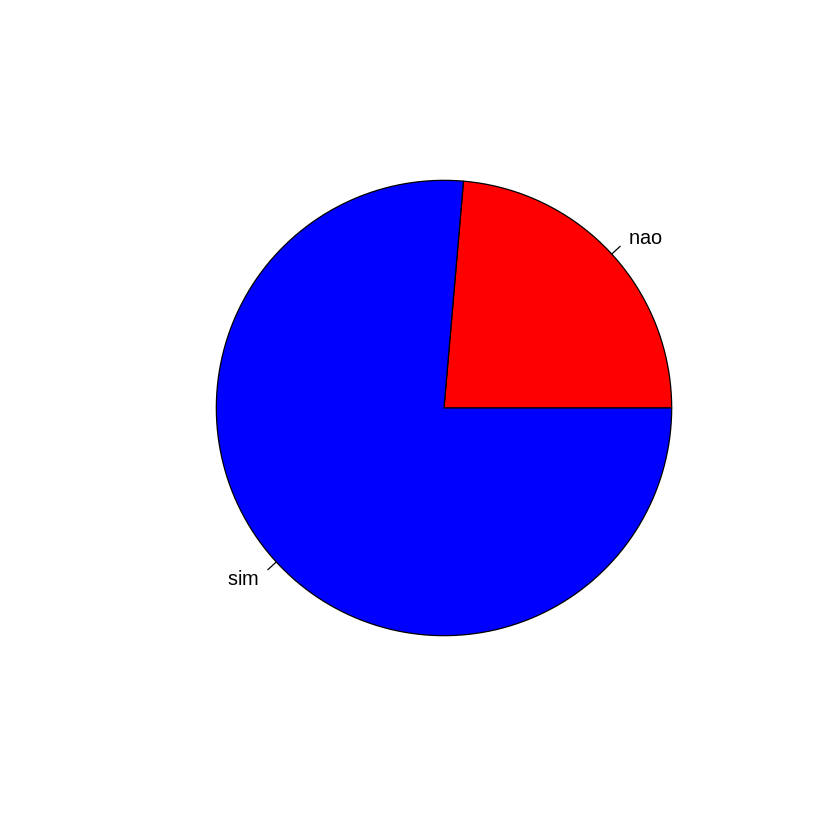

In [69]:
# Variável Alcool p/ df_controle:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
table(df_controle$ALCOOL)

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
round(prop.table(table(df_controle$ALCOOL))*100,2)
pie(table(df_controle$ALCOOL), col=c("red","blue"))

Tabela de frequência absoluta: 



nao sim 
254  36 


Tabela de frequência relativa (porcentagem)


  nao   sim 
87.59 12.41 

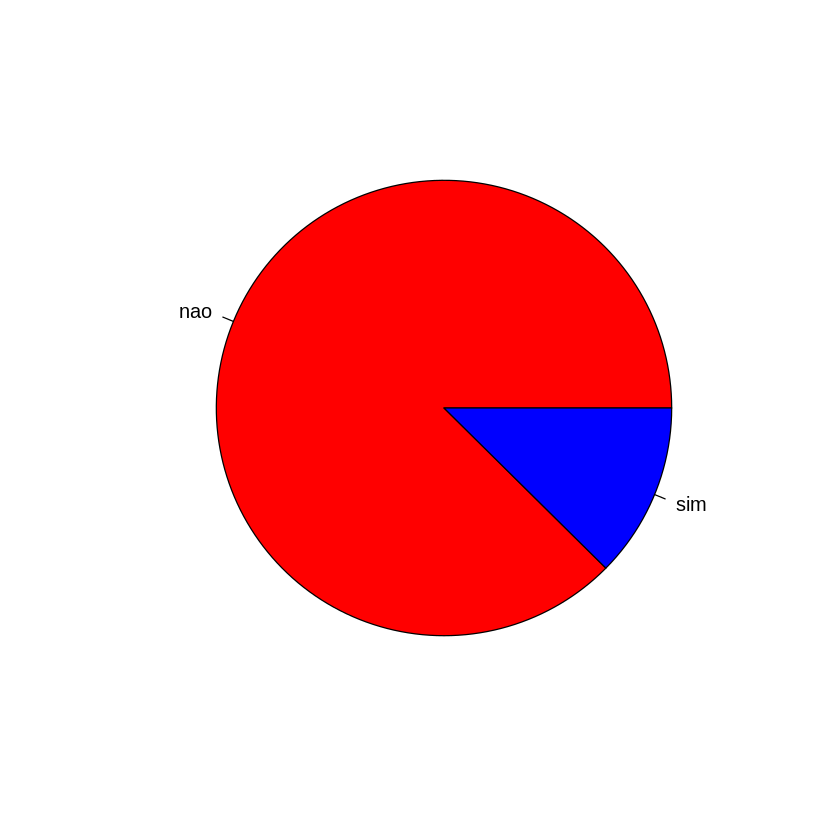

In [70]:
# Variável Alcool p/ df_caso:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
table(df_caso$ALCOOL)

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
round(prop.table(table(df_caso$ALCOOL))*100,2)
pie(table(df_caso$ALCOOL), col=c("red","blue"))

Tabela de frequência absoluta: 



<2500 >2500 
  590  3791 


Tabela de frequência relativa (porcentagem)


<2500 >2500 
13.47 86.53 

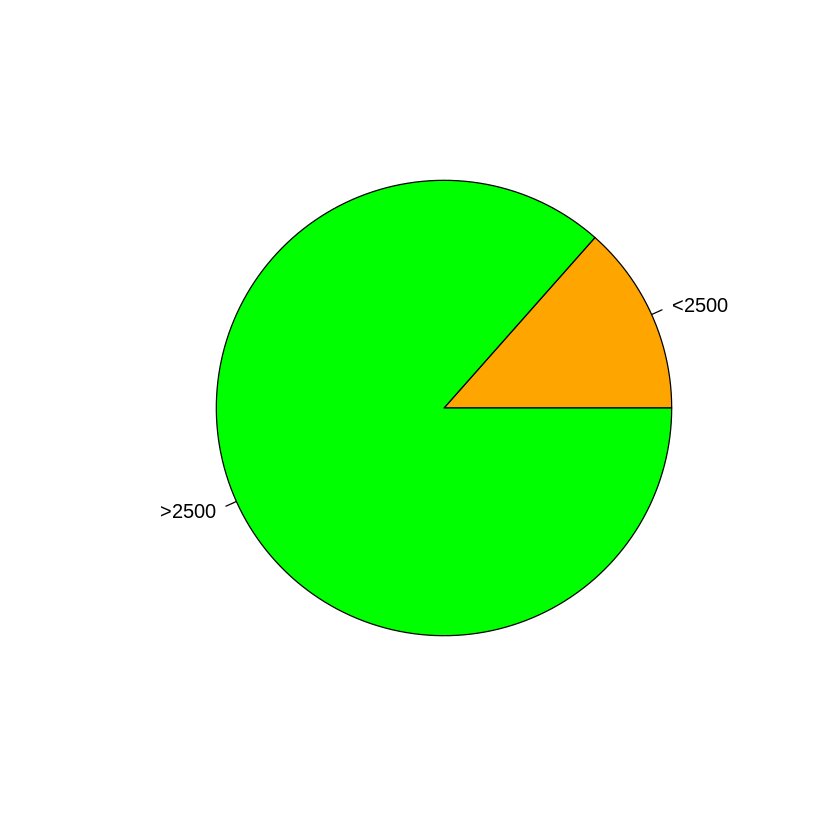

In [71]:
# Variável Peso p/ IHDP:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
freqP <- table(IHDP$FPESO)
freqP

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
propP <- prop.table(freqP)
round(propP*100,2)
pie(table(IHDP$FPESO), col=c("orange","green"))

Tabela de frequência absoluta: 



<2500 >2500 
  300  3791 


Tabela de frequência relativa (porcentagem)


<2500 >2500 
 7.33 92.67 

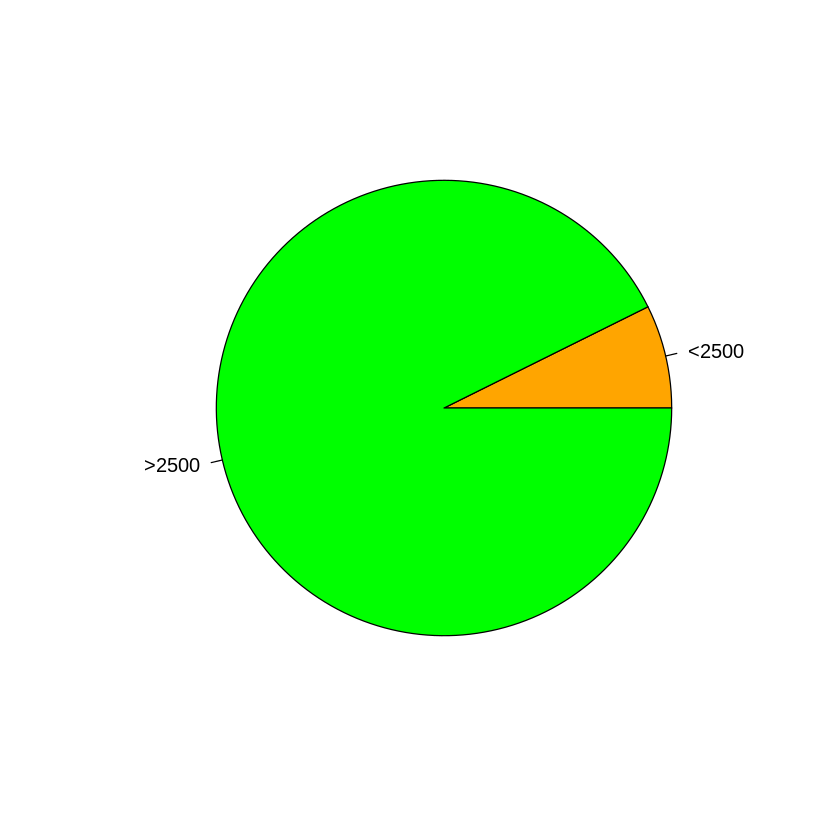

In [72]:
# Variável Peso p/ df_controle:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
freqP <- table(df_controle$FPESO)
freqP

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
propP <- prop.table(freqP)
round(propP*100,2)
pie(table(df_controle$FPESO), col=c("orange","green"))

Tabela de frequência absoluta: 



<2500 >2500 
  290     0 


Tabela de frequência relativa (porcentagem)


<2500 >2500 
  100     0 

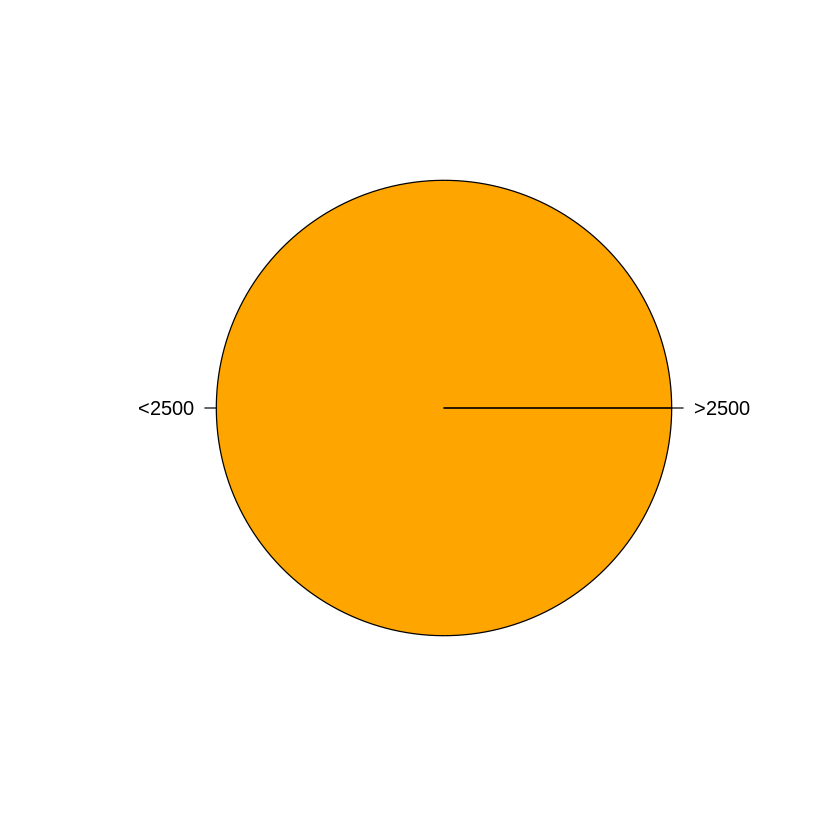

In [73]:
# Variável Peso p/ df_caso:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
freqP <- table(df_caso$FPESO)
freqP

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
propP <- prop.table(freqP)
round(propP*100,2)
pie(table(df_caso$FPESO), col=c("orange","green"))

Tabela de frequência absoluta: 



baixa media  alta 
 2414  1525   442 


Tabela de frequência relativa (porcentagem)


baixa media  alta 
55.10 34.81 10.09 

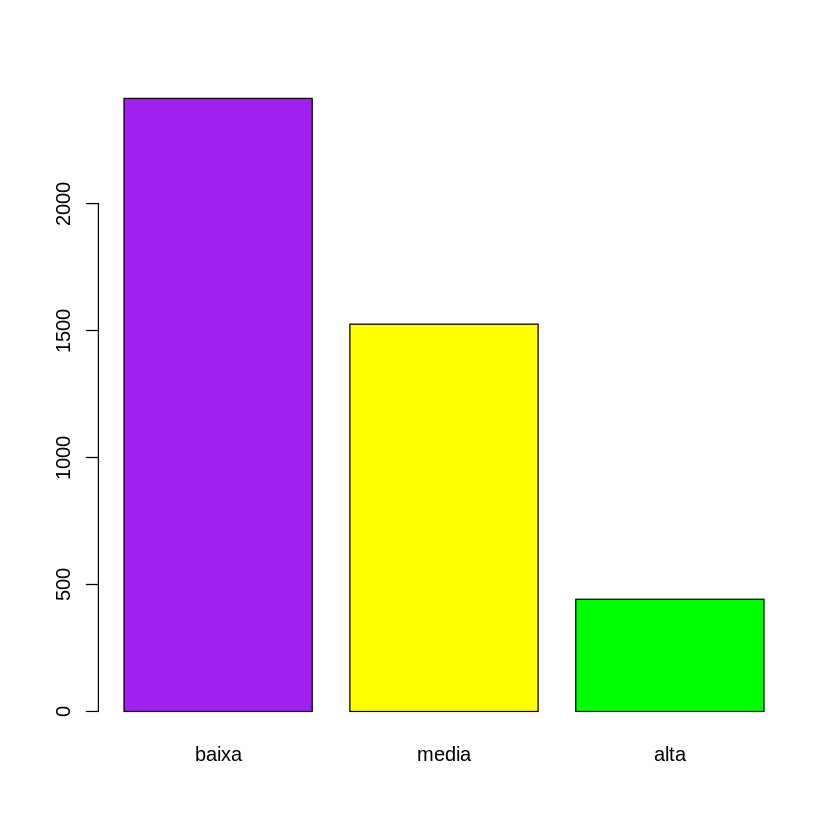

In [74]:
# Variável QI p/ IHDP:


# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
freqP <- table(IHDP$FQI)
freqP

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
propP <- prop.table(freqP)
round(propP*100,2)
barplot(table(IHDP$FQI), col=c("purple","yellow","green"))

Tabela de frequência absoluta: 



baixa media  alta 
 2273  1416   402 


Tabela de frequência relativa (porcentagem)


baixa media  alta 
55.56 34.61  9.83 

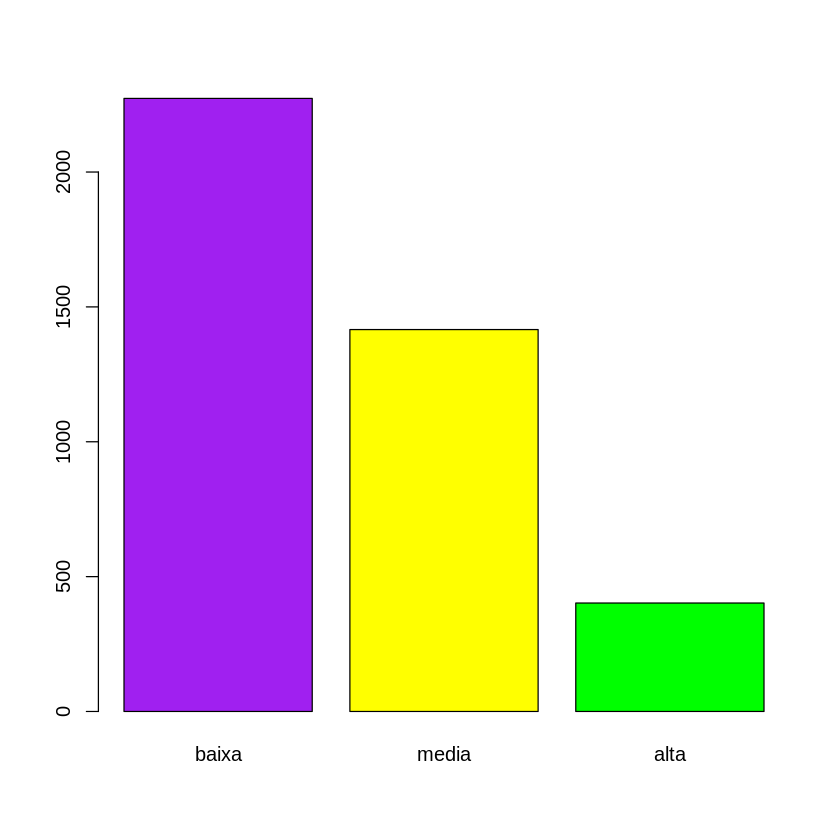

In [75]:
# Variável QI p/ df_controle:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
freqP <- table(df_controle$FQI)
freqP

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
propP <- prop.table(freqP)
round(propP*100,2)
barplot(table(df_controle$FQI), col=c("purple","yellow","green"))

Tabela de frequência absoluta: 



baixa media  alta 
  141   109    40 


Tabela de frequência relativa (porcentagem)


baixa media  alta 
48.62 37.59 13.79 

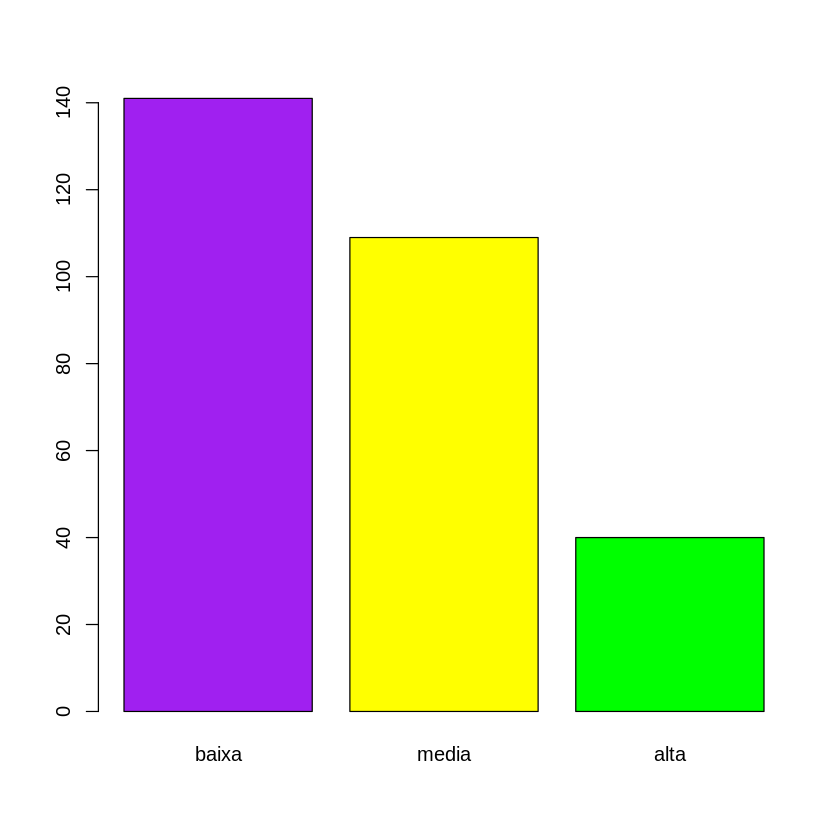

In [76]:
# Variável QI p/ df_caso:

# Tabela de frequência absoluta
cat("Tabela de frequência absoluta: \n")
freqP <- table(df_caso$FQI)
freqP

# Tabela de frequência relativa (porcentagem)
cat("\nTabela de frequência relativa (porcentagem)")
propP <- prop.table(freqP)
round(propP*100,2)
barplot(table(df_caso$FQI), col=c("purple","yellow","green"))

#### C. Análise bivariada das variáveis `ALCOOL`, `PESO`

Tabela de frequência absoluta: 


       
         nao  sim
  <2500  318  272
  >2500  903 2888


Tabela de frequência relativa (porcentagem)

       
          nao   sim
  <2500  7.26  6.21
  >2500 20.61 65.92

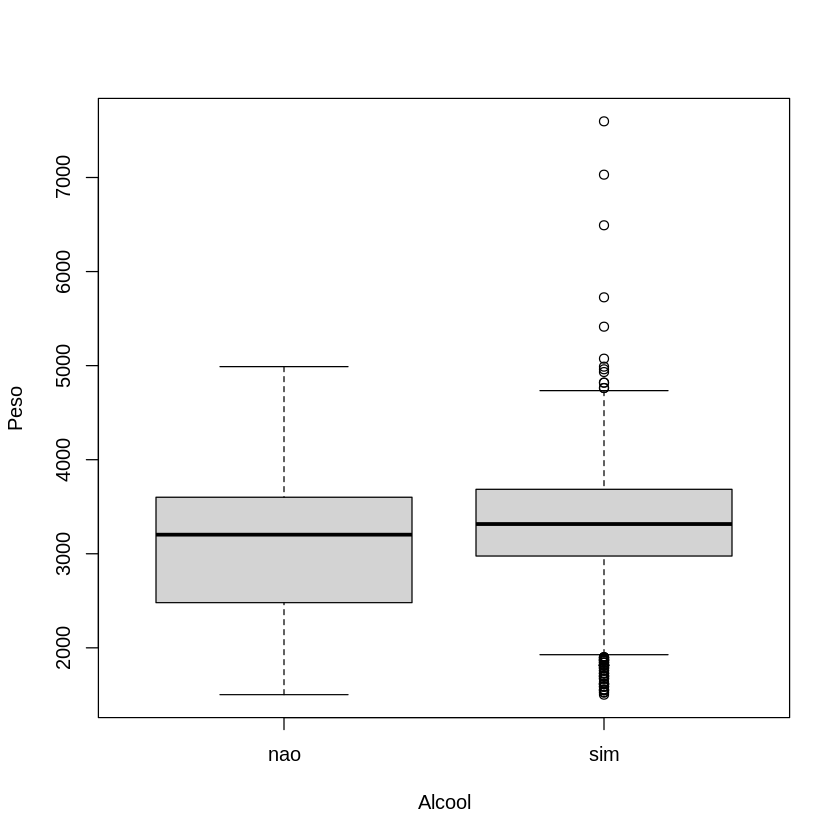

In [77]:
# Para IHDP:

# Tabela de frequência absoluta de mães por peso do filho(a) e se consome álcool durante a gravidez

cat("Tabela de frequência absoluta: \n")
freqPQ <- table(IHDP$FPESO, IHDP$ALCOOL)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem)")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(IHDP$ALCOOL, IHDP$PESO, xlab = "Alcool", ylab = "Peso")

Tabela de frequência absoluta: 


       
         nao  sim
  <2500   64  236
  >2500  903 2888


Tabela de frequência relativa (porcentagem)

       
          nao   sim
  <2500  1.56  5.77
  >2500 22.07 70.59

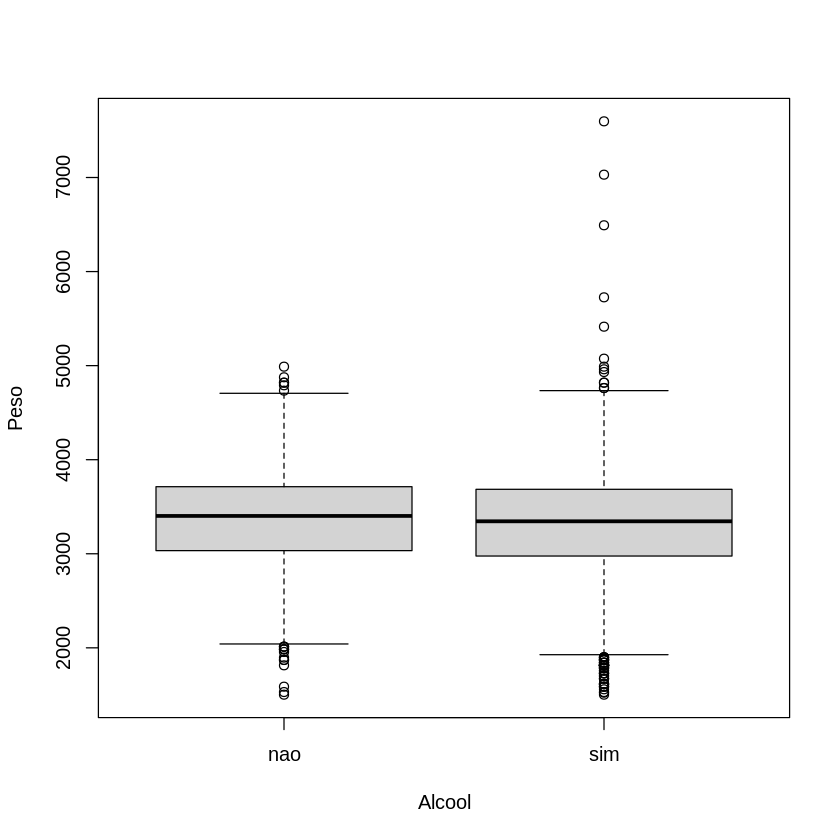

In [78]:
# Para grupo Controle:

# Tabela de frequência absoluta de mães por peso do filho(a) e se consome álcool durante a gravidez
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_controle$FPESO, df_controle$ALCOOL)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem)")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(df_controle$ALCOOL, df_controle$PESO, xlab = "Alcool", ylab = "Peso")

Tabela de frequência absoluta: 


       
        nao sim
  <2500 254  36
  >2500   0   0


Tabela de frequência relativa (porcentagem)

       
          nao   sim
  <2500 87.59 12.41
  >2500  0.00  0.00

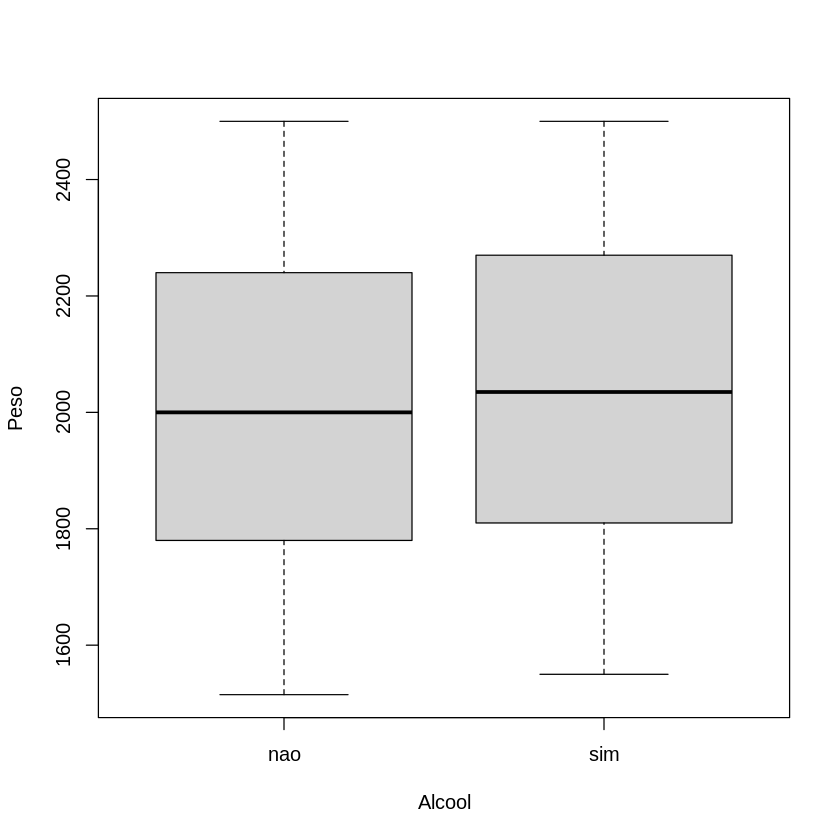

In [79]:
# Para grupo Caso:

# Tabela de frequência absoluta de mães por peso do filho(a) e se consome álcool durante a gravidez
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_caso$FPESO, df_caso$ALCOOL)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem)")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico

plot(df_caso$ALCOOL, df_caso$PESO, xlab = "Alcool", ylab = "Peso")

#### D. Análise bivariada das variáveis `ALCOOL` e `QI`

Tabela de frequência absoluta: 


       
         nao  sim
  baixa  620 1794
  media  450 1075
  alta   151  291


Tabela de frequência relativa (porcentagem)

       
          nao   sim
  baixa 14.15 40.95
  media 10.27 24.54
  alta   3.45  6.64

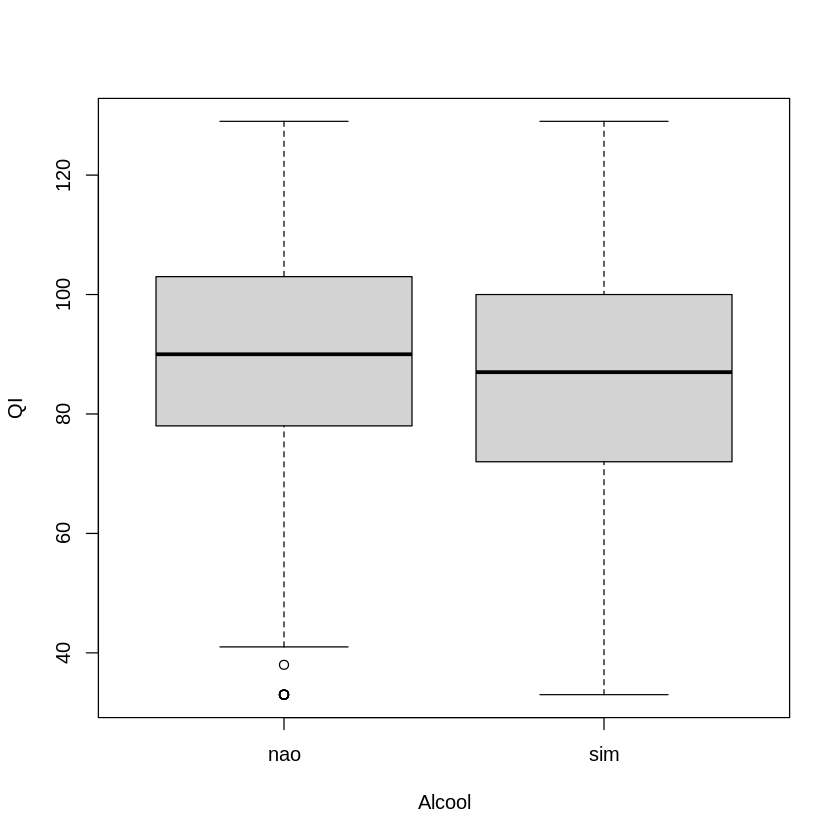

In [80]:
# Para IHDP:

# Tabela de frequência absoluta de mães por peso do filho(a) e se consome álcool durante a gravidez
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(IHDP$FQI, IHDP$ALCOOL)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem)")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(IHDP$ALCOOL, IHDP$QI, xlab = "Alcool", ylab = "QI")

Tabela de frequência absoluta: 


       
         nao  sim
  baixa  493 1780
  media  356 1060
  alta   118  284


Tabela de frequência relativa (porcentagem)

       
          nao   sim
  baixa 12.05 43.51
  media  8.70 25.91
  alta   2.88  6.94

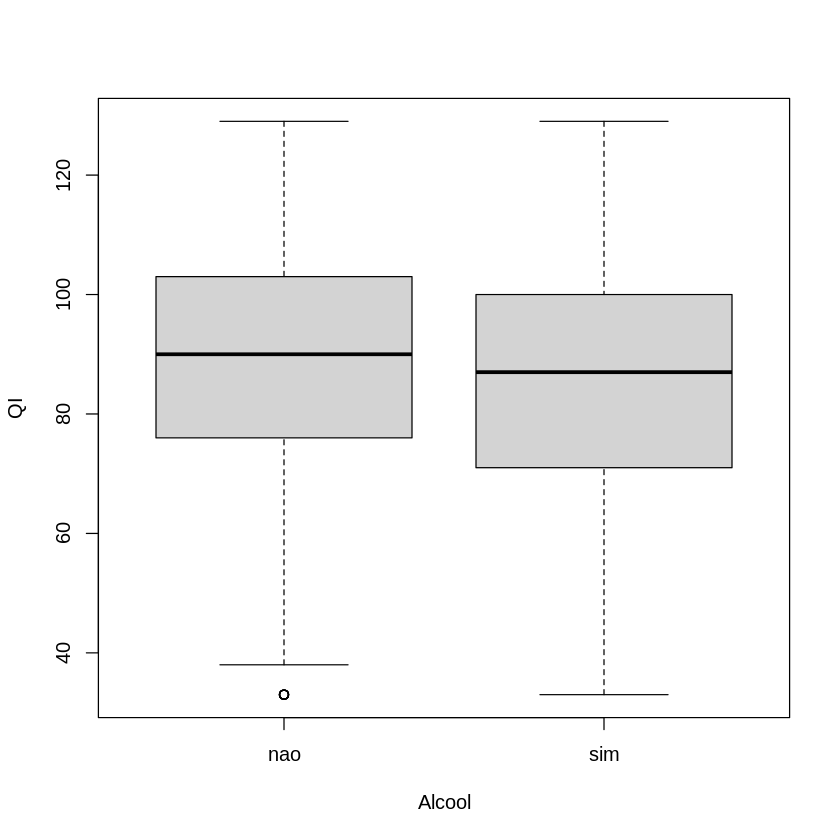

In [81]:
# Para grupo Controle:

# Tabela de frequência absoluta de mães por peso do filho(a) e se consome álcool durante a gravidez
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_controle$FQI, df_controle$ALCOOL)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem)")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(df_controle$ALCOOL, df_controle$QI, xlab = "Alcool", ylab = "QI")

Tabela de frequência absoluta: 


       
        nao sim
  baixa 127  14
  media  94  15
  alta   33   7


Tabela de frequência relativa (porcentagem)

       
          nao   sim
  baixa 43.79  4.83
  media 32.41  5.17
  alta  11.38  2.41

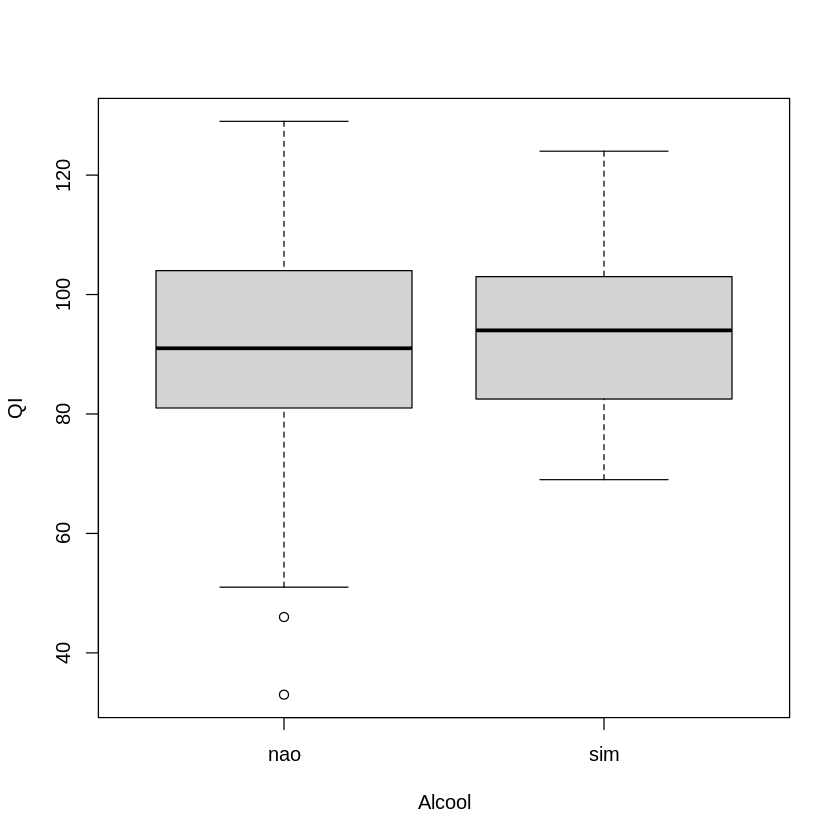

In [82]:
# Para grupo Caso:

# Tabela de frequência absoluta de mães por peso do filho(a) e se consome álcool durante a gravidez
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_caso$FQI, df_caso$ALCOOL)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem)")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(df_caso$ALCOOL, df_caso$QI, xlab = "Alcool", ylab = "QI")

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães que usaram bebida alcoólica durante a gravidez

In [175]:

# Correlação entre PESO e QI geral

cat("O valor da correlação foi de: \n")
cor(IHDP$PESO,IHDP$QI,  method = 'pearson')

cat("\nO valor da correlação p/ o grupo Controle foi de: \n")
cor(df_controle$PESO, df_controle$QI,  method = 'pearson')

cat("\nO valor da correlação p/ o grupo Caso foi de: \n")
cor(df_caso$PESO, df_caso$QI, method = 'pearson')

cat("\nSegundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no geral é pequena mesmo nas divisões entre Caso e Controle.")

O valor da correlação foi de: 


[1] 0.04634357


O valor da correlação p/ o grupo Controle foi de: 


[1] 0.1001611


O valor da correlação p/ o grupo Caso foi de: 


[1] 0.104043


Segundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes. 
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no geral é pequena mesmo nas divisões entre Caso e Controle.

In [84]:
# Criando um subset com mães que ingeriram bebida alcoólicas durante a gravidez
df_alcoolsim <- subset(IHDP, IHDP$ALCOOL == "sim")

# Observando o subset
head(df_alcoolsim)


,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500,baixa
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500,media
8,20,branca,medio_incompleto,nao,sim,sim,sim,fem,nao,2410,3,6,11344,caso,82,<2500,baixa
26,20,negra,medio_incompleto,nao,sim,sim,sim,fem,sim,2300,3,1,8750,caso,96,<2500,media
70,30,branca,medio,sim,sim,nao,sim,fem,sim,2500,4,10,50000,caso,102,<2500,media
75,28,branca,medio,sim,sim,nao,sim,masc,sim,1620,6,33,50000,caso,93,<2500,media


In [174]:
# Correlação de PESO e QI
cat("O valor da correlação foi de: \n")
cor(df_alcoolsim$PESO,df_alcoolsim$QI, method = 'pearson')

# Correlação de PESO e QI p/ grupo caso
cat("\nO valor da correlação p/ o grupo Caso foi de: \n")
cor(df_alcoolsim$PESO[df_alcoolsim$TRT == 'caso'],df_alcoolsim$QI[df_alcoolsim$TRT == 'caso'], method = 'pearson')

# Correlação de PESO e QI p/ grupo controle
cat("\nO valor da correlação p/ o grupo Controle foi de: \n")
cor(df_alcoolsim$PESO[df_alcoolsim$TRT == 'controle'],df_alcoolsim$QI[df_alcoolsim$TRT == 'controle'], method = 'pearson')


cat("\nSegundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI em mães que usaram bebida alcoólica durante a gravidez é fraca mesmo nas divisões entre Caso e Controle.
No grupo Caso a correlação foi maior, mas ainda dentro do intervalo que considera correlação pequena.")

O valor da correlação foi de: 


[1] 0.07871286


O valor da correlação p/ o grupo Caso foi de: 


[1] 0.2370378


O valor da correlação p/ o grupo Controle foi de: 


[1] 0.09238961


Segundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes. 
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI em mães que usaram bebida alcoólica durante a gravidez é fraca mesmo nas divisões entre Caso e Controle.
No grupo Caso a correlação foi maior, mas ainda dentro do intervalo que considera correlação pequena.

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães que não usaram bebida alcoólica durante a gravidez

In [86]:
# Criando um subset com mães que NÃO ingeriram bebida alcoólicas durante a gravidez
df_alcoolnao <- subset(IHDP, IHDP$ALCOOL == "nao")

# Observando o subset
head(df_alcoolnao)


,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500,alta
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500,media
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500,media
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500,baixa
7,26,branca,medio_incompleto,sim,sim,sim,nao,masc,nao,2330,9,8,17500,caso,104,<2500,media
9,23,branca,medio,sim,sim,nao,nao,fem,nao,1776,6,30,30000,caso,107,<2500,media


In [171]:
# Correlação de PESO e QI
cat("O valor da correlação foi de: \n")
cor(df_alcoolnao$PESO,df_alcoolnao$QI, method = 'pearson')

# Correlação de PESO e QI p/ grupo caso
cat("\nO valor da correlação p/ o grupo Caso foi de: \n")
cor(df_alcoolnao$PESO[df_alcoolnao$TRT == 'caso'],df_alcoolnao$QI[df_alcoolnao$TRT == 'caso'], method = 'pearson')

# Correlação de PESO e QI p/ grupo controle
cat("\nO valor da correlação p/ o grupo Controle foi de: \n")
cor(df_alcoolnao$PESO[df_alcoolnao$TRT == 'controle'],df_alcoolnao$QI[df_alcoolnao$TRT == 'controle'], method = 'pearson')

cat("\n Segundo o coeficiente de correlação de  Pearson  ( r ), valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
 Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

 Portanto a correlação entre PESO e QI em mães que NÂO usaram bebida alcoólica durante a gravidez também é fraca mesmo nas divisões entre Caso e Controle.
 No grupo Controle a correlação foi maior, mas ainda dentro do intervalo que considera correlação pequena.")

O valor da correlação foi de: 


[1] 0.02943064


O valor da correlação p/ o grupo Caso foi de: 


[1] 0.08596019


O valor da correlação p/ o grupo Controle foi de: 


[1] 0.1174314


 Segundo o coeficiente de correlação de  Pearson  ( r ), valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes. 
 Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

 Portanto a correlação entre PESO e QI em mães que NÂO usaram bebida alcoólica durante a gravidez também é fraca mesmo nas divisões entre Caso e Controle.
 No grupo Controle a correlação foi maior, mas ainda dentro do intervalo que considera correlação pequena.

### 4.3.8. Variável `genero` (G8)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `GENERO`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `GENERO`, `PESO`

#### D. Análise bivariada das variáveis `GENERO` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães com filho do gênero masculino

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com filho do gênero feminino

### 4.3.9. Variável `primog` (G6)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### B. Análise univariada das variáveis `PRIMOG`, `PESO` e `QI`

#### C. Análise bivariada das variáveis `PRIMOG`, `PESO`

#### D. Análise bivariada das variáveis `PRIMOG` e `QI`

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães que o filho(a) é a primeira gestação

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães que o filho(a) não é a primeira gestação

### 4.3.10. Variável `peso` (G7)

#### A. Estatísticas básicas

#### B. Categorização das variáveis `PESO` e `QI` conforme 8.1

#### C. Análise univariada das variáveis `PESO` e `QI`

#### E. Análise bivariada das variáveis `PESO` e `QI`

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com filho abaixo de 2500g (`BAIXO`)

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães com filho acima de 2500g (`NORMAL`)

### 4.3.11. Variável `premat` (G2)

#### A. Categorização das variáveis `PESO` e `QI` conforme 8.1

In [106]:
# Já foi realizado a categorização das duas colunas:

cat("Resumo da coluna FPESO: \n")
summary(IHDP$FPESO)
cat("\nResumo da coluna FQI: \n")
summary(IHDP$FQI)

# Também feito para as colunas subset dos grupos controle e caso

Resumo da coluna FPESO: 


<2500 >2500 
  590  3791


Resumo da coluna FQI: 


baixa media  alta 
 2414  1525   442

#### B. Análise univariada das variáveis `PREMAT`, `PESO` e `QI`

In [107]:
# Criar uma coluna de classificação:

PREMATCAT <- makeFactor(
    IHDP,
    'PREMAT',
    c(-Inf,1,6,9,Inf),
    c('ausente','moderada','alta','extrema')
)
IHDP$FPREMAT <- PREMATCAT
head(IHDP)



,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500,alta,extrema
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500,baixa,moderada
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500,media,moderada
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500,media,alta
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500,baixa,moderada
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500,media,moderada


In [108]:
# Para df_controle:

PREMATCAT <- makeFactor(
    df_controle,
    'PREMAT',
    c(-Inf,1,6,9,Inf),
    c('ausente','moderada','alta','extrema')
)
df_controle$FPREMAT <- PREMATCAT
head(df_controle)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
291,19,branca,medio_incompleto,sim,sim,sim,nao,masc,sim,4592,0,8,17000,controle,97,>2500,media,ausente
292,22,branca,medio_incompleto,nao,sim,nao,sim,masc,nao,4082,-1,3,9750,controle,99,>2500,media,ausente
293,24,branca,medio_incompleto,nao,sim,sim,nao,masc,nao,3175,3,5,30000,controle,94,>2500,media,moderada
294,24,branca,medio,sim,sim,nao,sim,masc,nao,4139,1,4,27761,controle,33,>2500,baixa,ausente
295,27,branca,medio_incompleto,sim,sim,sim,sim,masc,nao,3679,1,7,30000,controle,105,>2500,media,ausente
296,27,branca,superior,nao,sim,sim,sim,masc,sim,3316,1,63,39902,controle,115,>2500,alta,ausente


In [109]:
# Para df_caso:

PREMATCAT <- makeFactor(
    df_caso,
    'PREMAT',
    c(-Inf,1,6,9,Inf),
    c('ausente','moderada','alta','extrema')
)
df_caso$FPREMAT <- PREMATCAT
head(df_caso)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500,alta,extrema
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500,baixa,moderada
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500,media,moderada
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500,media,alta
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500,baixa,moderada
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500,media,moderada


IHDP: 


ausente moderada     alta  extrema 
    3208      979      168       26

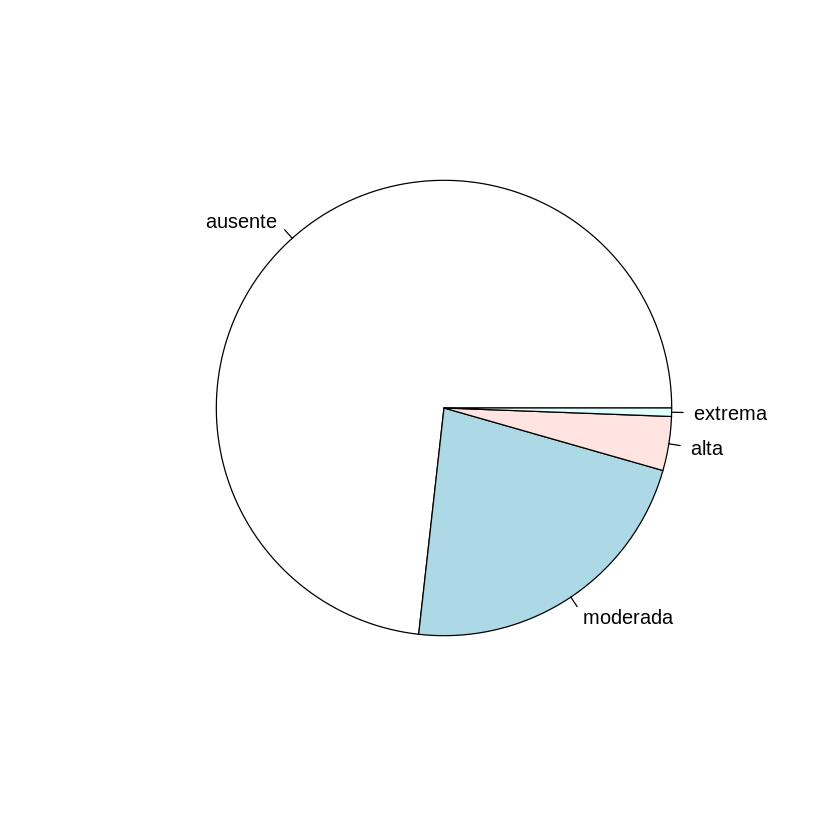

In [110]:
# Analisando a coluna FPREMAT:

cat("IHDP: \n")
summary(IHDP$FPREMAT)
cat("\n")


pie(table(IHDP$FPREMAT))

Grupo Controle: 


ausente moderada     alta  extrema 
    3208      792       82        9


Grupo Caso: 


ausente moderada     alta  extrema 
       0      187       86       17

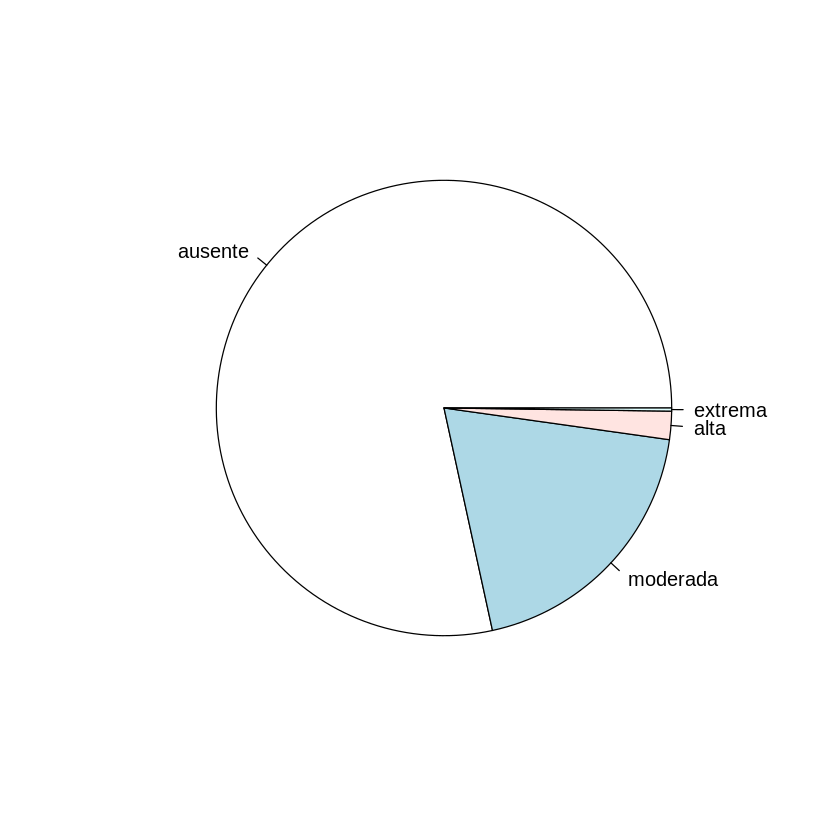

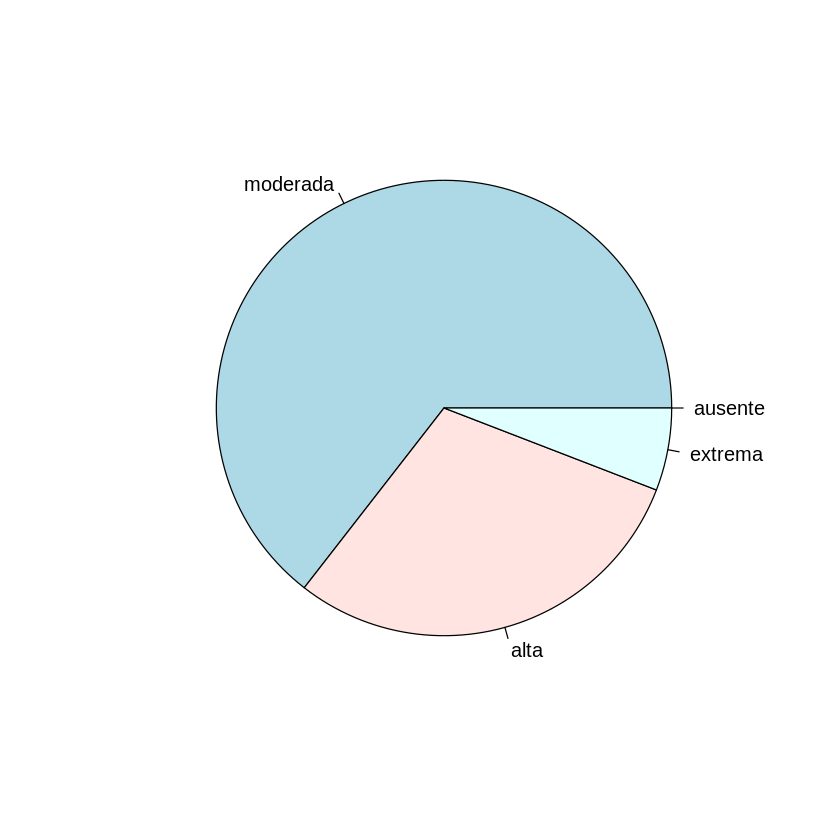

In [111]:
# Comparando os dois gráficos de pizzas dos dois grupos:

cat("Grupo Controle: \n")
summary(df_controle$FPREMAT)
cat("\n")
cat("Grupo Caso: \n")
summary(df_caso$FPREMAT)
cat("\n")
pie(table(df_controle$FPREMAT))
pie(table(df_caso$FPREMAT))

Resumo QI: 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   73.00   88.00   86.34  101.00  129.00 

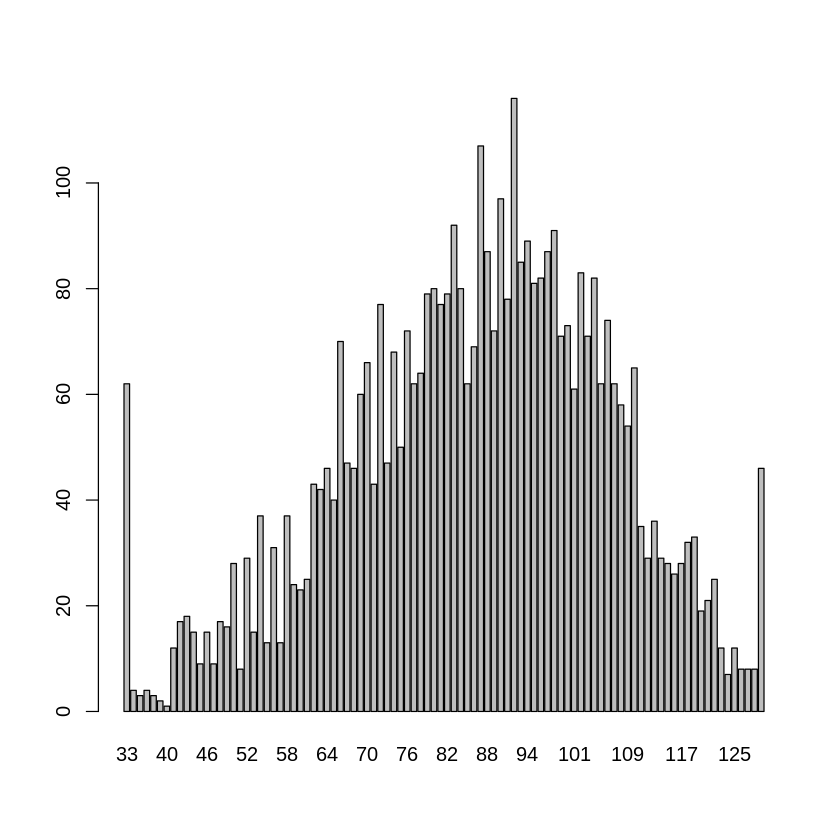

In [112]:
# Variável QI

cat("Resumo QI: \n")
cat("\n")
summary(IHDP$QI)
barplot(table(IHDP$QI))

Resumo QI p/ df_controle: 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   72.00   88.00   85.93  101.00  129.00 


Resumo QI p/ df_caso: 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.00   81.00   92.00   92.05  104.00  129.00 

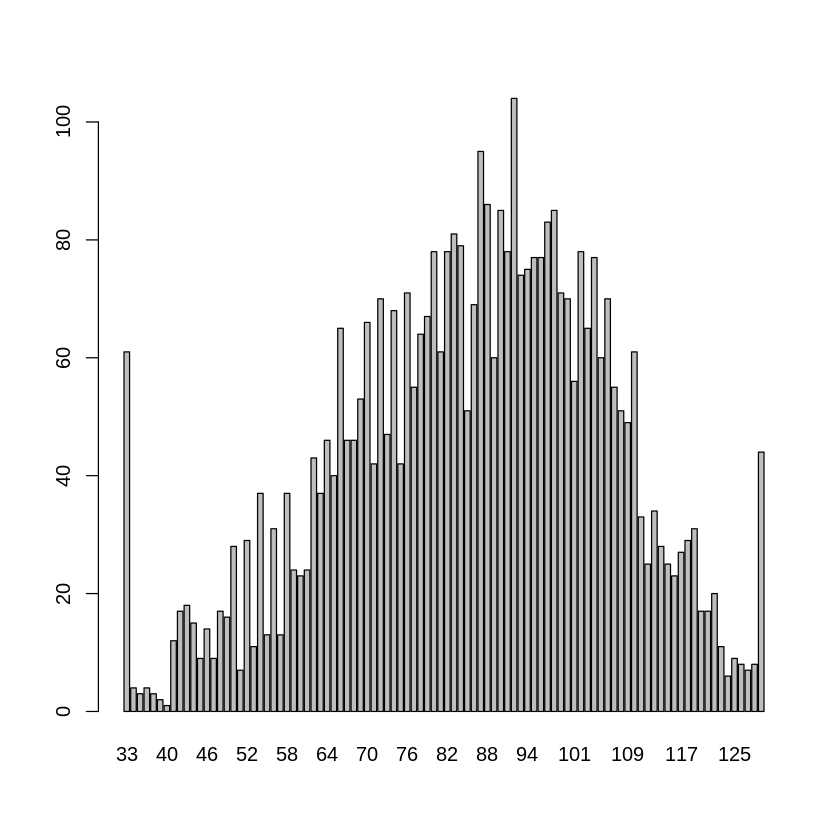

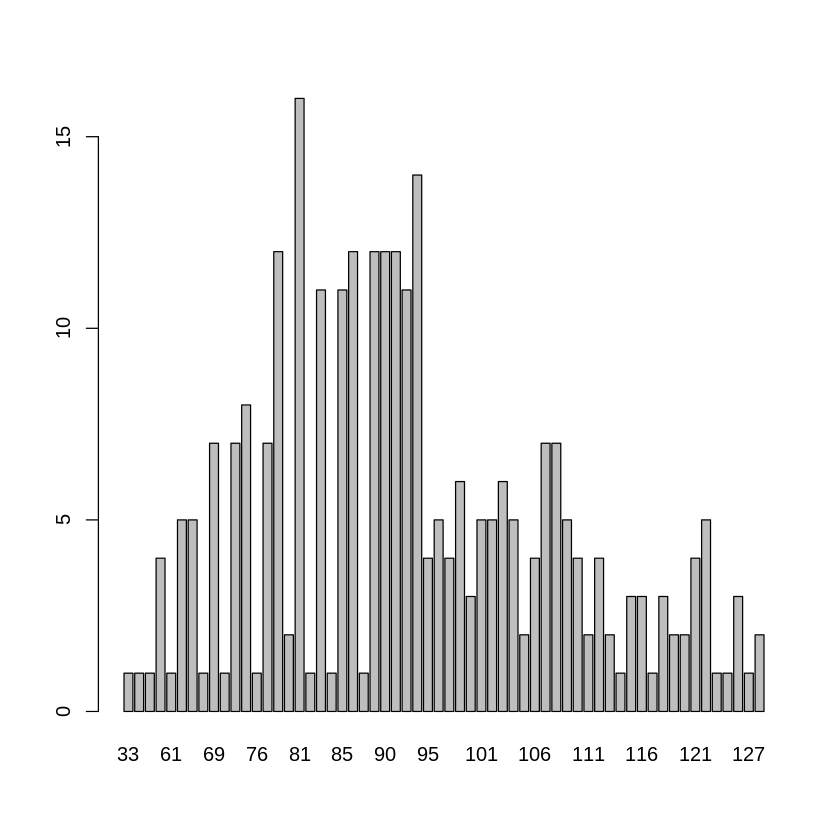

In [113]:
cat("Resumo QI p/ df_controle: \n")
cat("\n")
summary(df_controle$QI)
barplot(table(df_controle$QI))

cat("\nResumo QI p/ df_caso: \n")
cat("\n")
summary(df_caso$QI)
barplot(table(df_caso$QI))

Tabela de frequência absoluta: 



baixa media  alta 
 2414  1525   442 


Tabela de frequência relativa (porcentagem): 



baixa media  alta 
55.10 34.81 10.09 

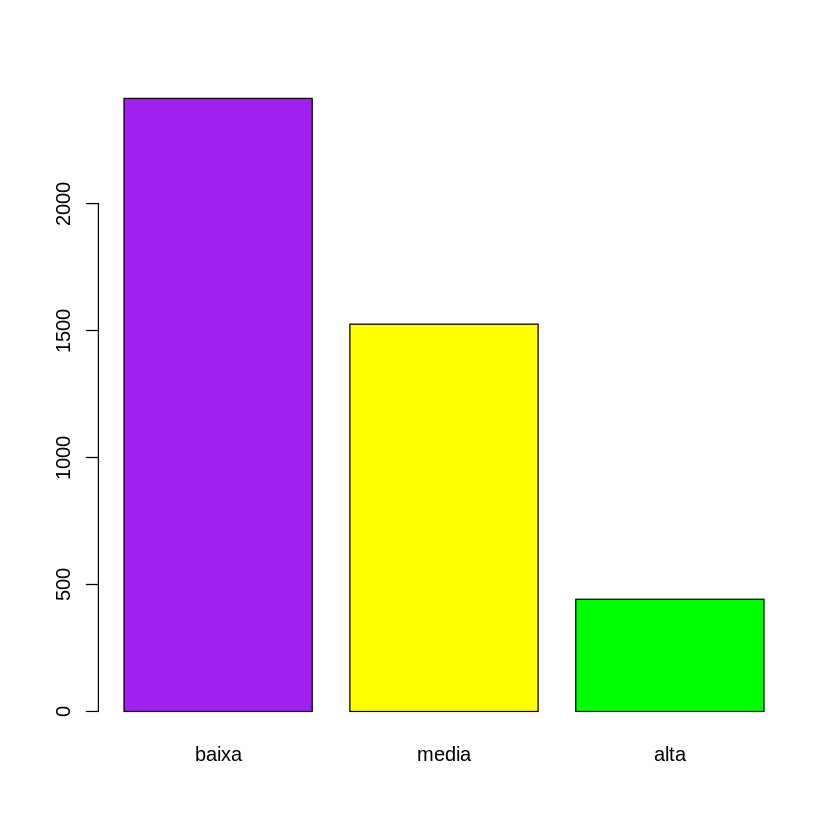

In [114]:
# Variável QI p/ IHDP:

cat("Tabela de frequência absoluta: \n")
freqP <- table(IHDP$FQI)
freqP

cat("\nTabela de frequência relativa (porcentagem): \n")
propP <- prop.table(freqP)
round(propP*100,2)
barplot(table(IHDP$FQI), col=c("purple","yellow","green"))



Variável QI p/ df_controle: 



baixa media  alta 
 2273  1416   402 


baixa media  alta 
55.56 34.61  9.83 


Variável QI p/ df_caso: 



baixa media  alta 
  141   109    40 


baixa media  alta 
48.62 37.59 13.79 

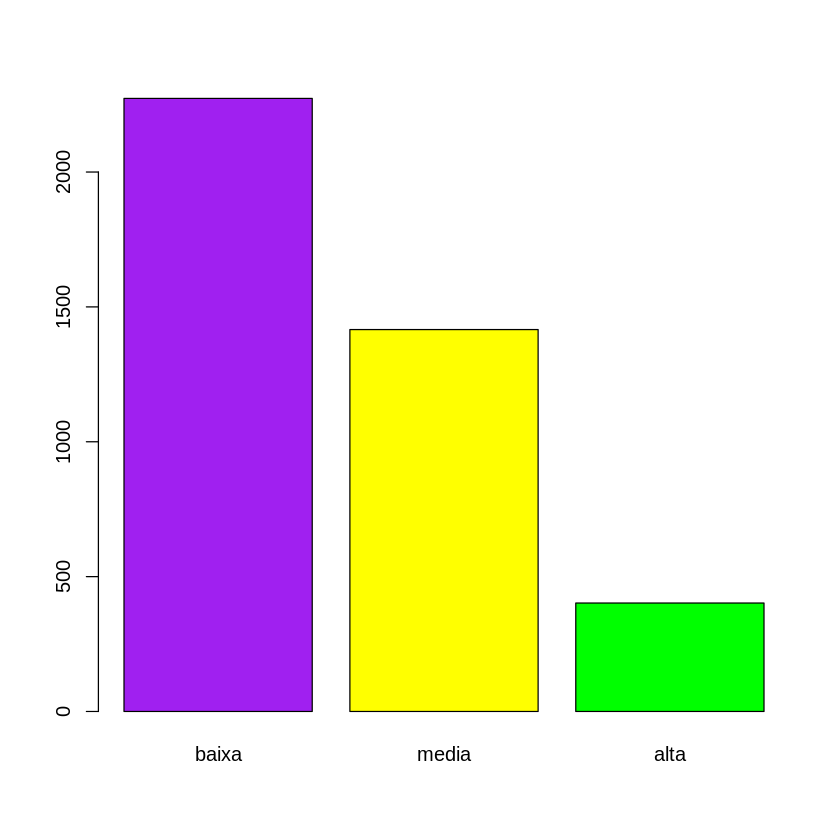

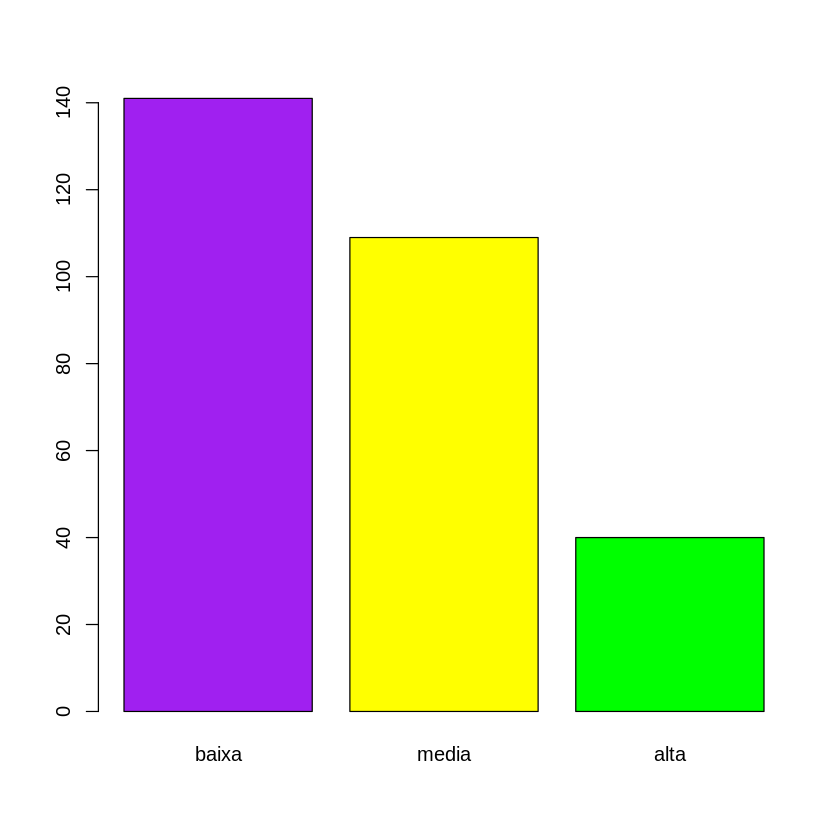

In [115]:
# Variável QI p/ df_controle:

cat("Variável QI p/ df_controle: \n")
freqP <- table(df_controle$FQI)
freqP
propP <- prop.table(freqP)
round(propP*100,2)
barplot(table(df_controle$FQI), col=c("purple","yellow","green"))

# Variável QI p/ df_caso:

cat("\nVariável QI p/ df_caso: \n")
freqP <- table(df_caso$FQI)
freqP
propP <- prop.table(freqP)
round(propP*100,2)
barplot(table(df_caso$FQI), col=c("purple","yellow","green"))

# Houve um leve aumento do QI do grupo Caso em relação ao controle.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1502    2891    3288    3247    3657    7597 

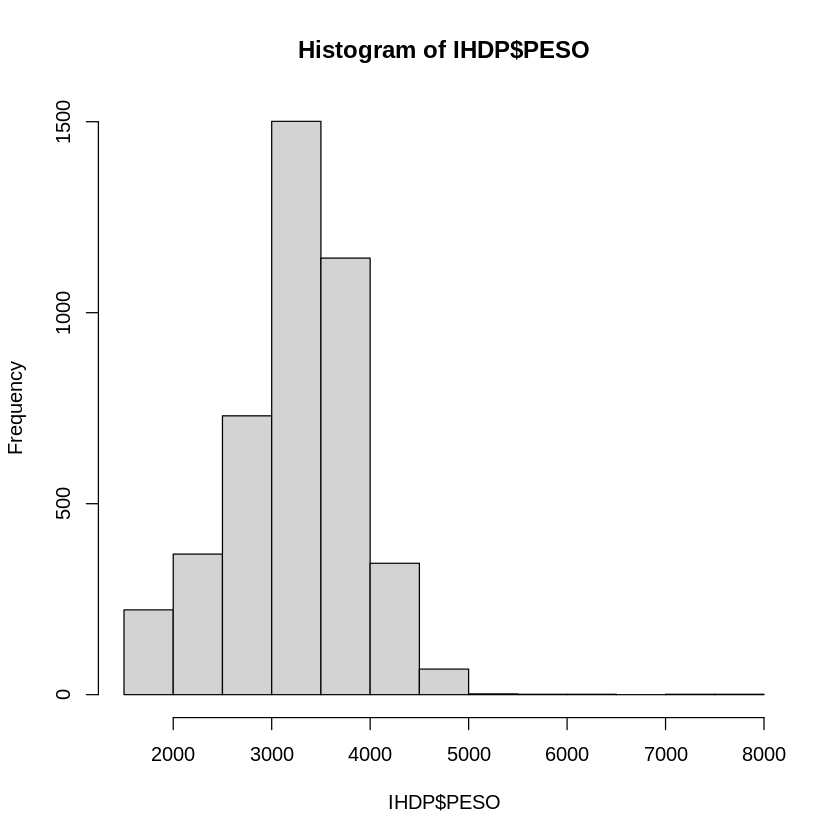

In [116]:
# Variável Peso:

summary(IHDP$PESO)
hist(IHDP$PESO)

Variável PESO p/ df_caso: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1515    1780    2000    2009    2240    2500 


Variável PESO p/ df_controle: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1502    2976    3345    3335    3685    7597 

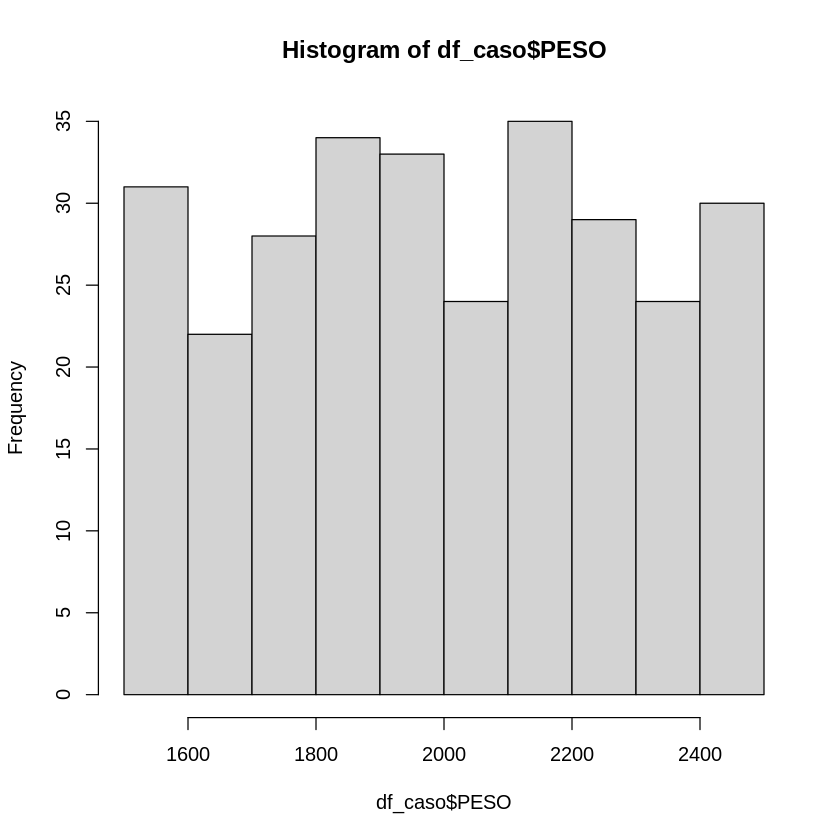

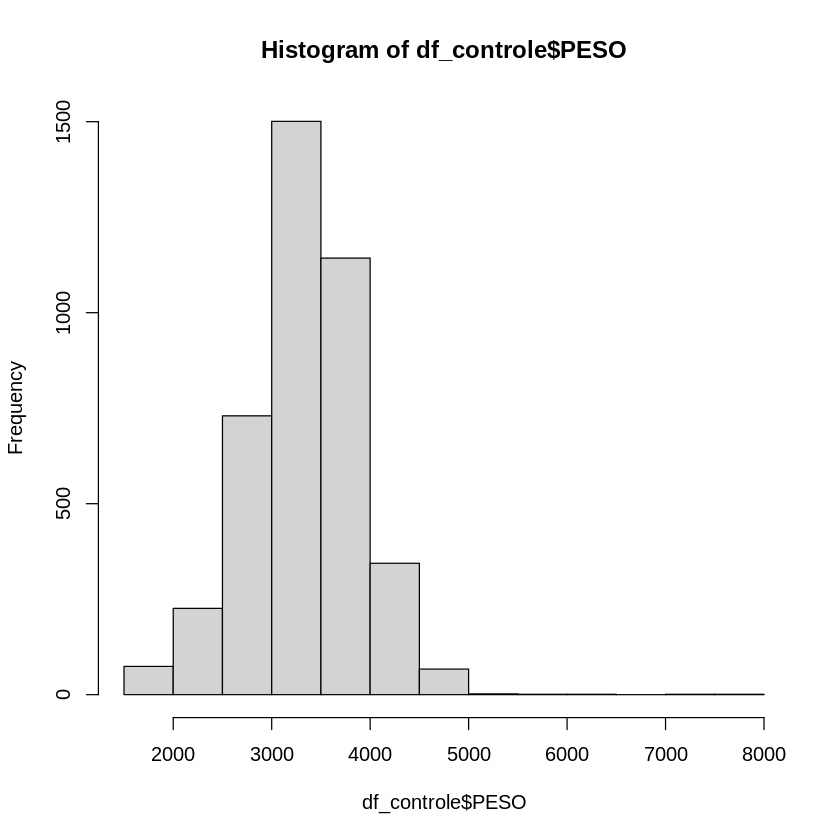

In [117]:
cat("Variável PESO p/ df_caso: \n")
summary(df_caso$PESO)
hist(df_caso$PESO)

cat("\nVariável PESO p/ df_controle: \n")
summary(df_controle$PESO)
hist(df_controle$PESO)

Tabela de frequência absoluta: 



<2500 >2500 
  590  3791 


Tabela de frequência relativa (porcentagem): 



<2500 >2500 
13.47 86.53 

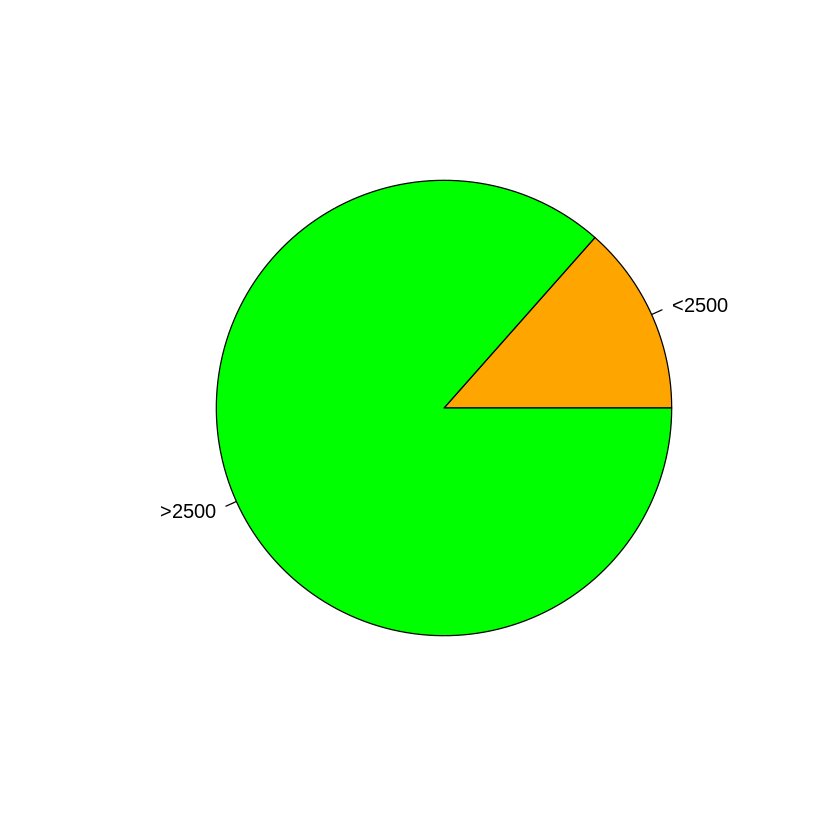

In [118]:
# Variável Peso p/ IHDP:

cat("Tabela de frequência absoluta: \n")
freqP <- table(IHDP$FPESO)
freqP
cat("\nTabela de frequência relativa (porcentagem): \n")
propP <- prop.table(freqP)
round(propP*100,2)
pie(table(IHDP$FPESO), col=c("orange","green"))


Variável PESO p/ df_controle: 



<2500 >2500 
  300  3791 


<2500 >2500 
 7.33 92.67 


Variável PESO p/ df_caso: 



<2500 >2500 
  290     0 


<2500 >2500 
  100     0 

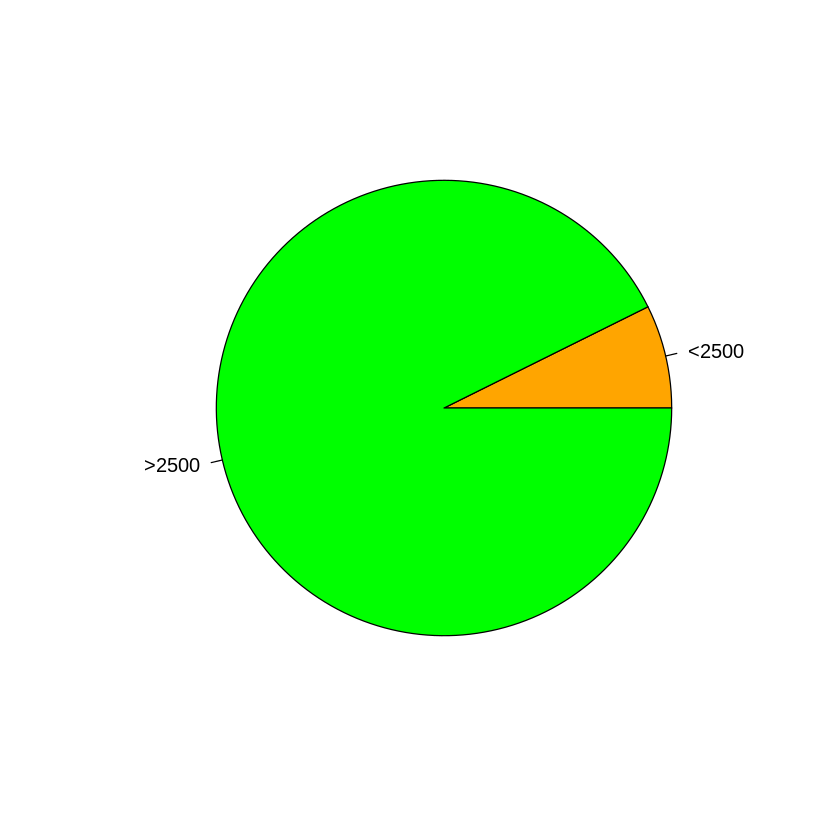

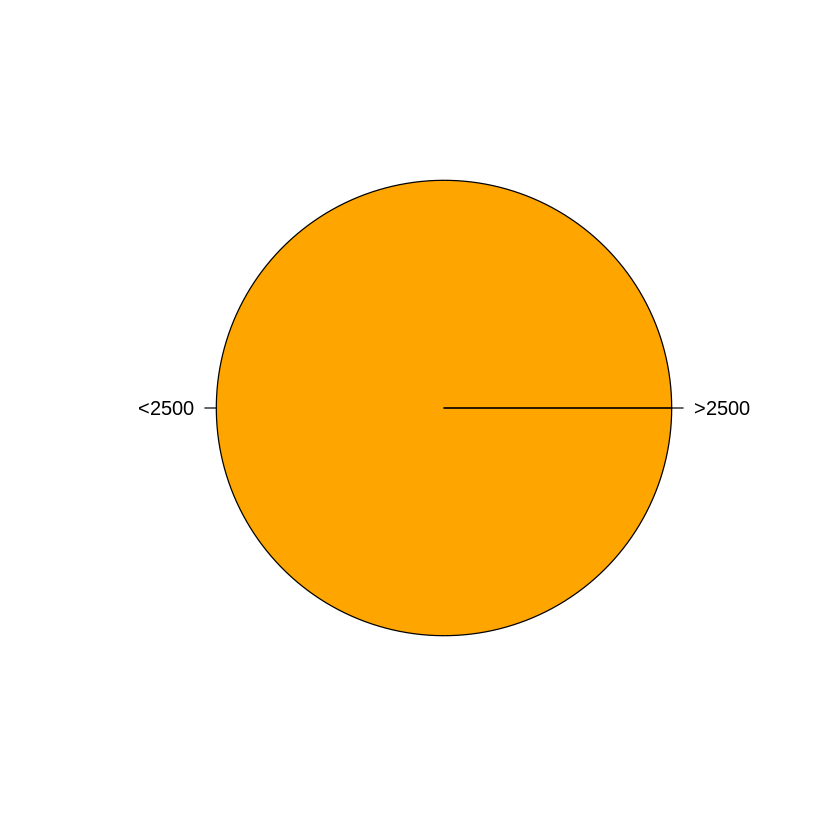

In [119]:
# Variável Peso p/ df_controle:

cat("Variável PESO p/ df_controle: \n")

freqP <- table(df_controle$FPESO)
freqP
propP <- prop.table(freqP)
round(propP*100,2)
pie(table(df_controle$FPESO), col=c("orange","green"))


# Variável Peso p/ df_caso:

cat("\nVariável PESO p/ df_caso: \n")
freqP <- table(df_caso$FPESO)
freqP
propP <- prop.table(freqP)
round(propP*100,2)
pie(table(df_caso$FPESO), col=c("orange","green"))

#### C. Análise bivariada das variáveis `PREMAT`, `PESO`

Tabela de frequência absoluta: 


       
        ausente moderada alta extrema
  <2500      98      319  149      24
  >2500    3110      660   19       2


Tabela de frequência relativa (porcentagem): 


       
        ausente moderada  alta extrema
  <2500    2.24     7.28  3.40    0.55
  >2500   70.99    15.07  0.43    0.05

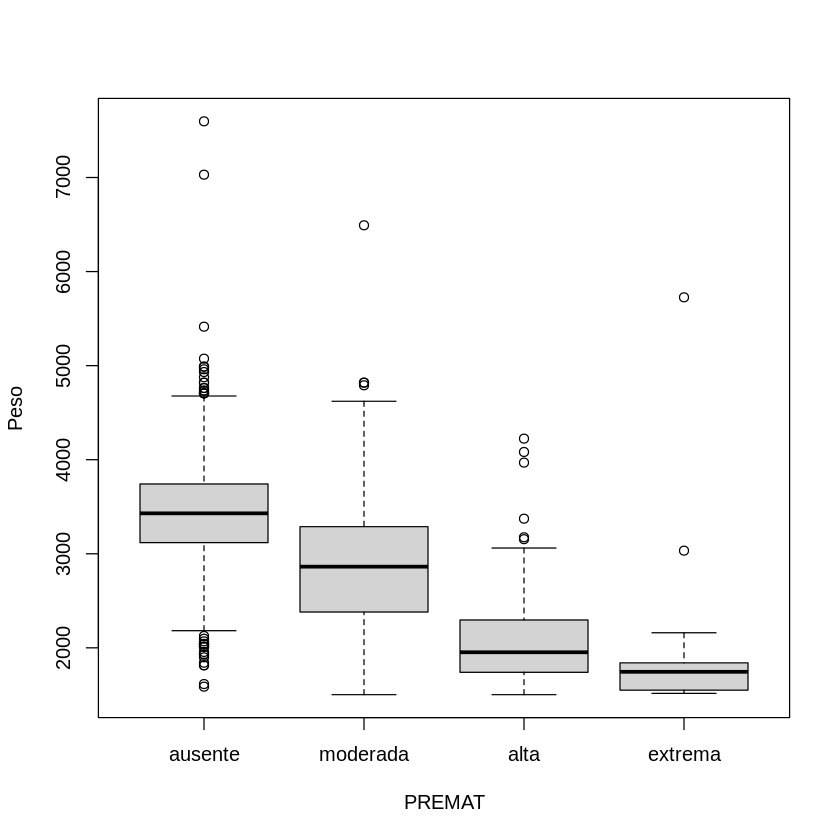

In [120]:
# Para IHDP:

# Tabela de frequência absoluta de mães por peso do filho(a) e Número de semanas de prematuridade.

cat("Tabela de frequência absoluta: \n")
freqPQ <- table(IHDP$FPESO, IHDP$FPREMAT)
freqPQ

# Tabela de frequência relativa da variável FPESO e PREMAT
cat("\nTabela de frequência relativa (porcentagem): \n")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(IHDP$FPREMAT, IHDP$PESO, xlab = "PREMAT", ylab = "Peso")

Tabela de frequência absoluta: 


       
        ausente moderada alta extrema
  <2500      98      132   63       7
  >2500    3110      660   19       2


Tabela de frequência relativa (porcentagem): 


       
        ausente moderada  alta extrema
  <2500    2.40     3.23  1.54    0.17
  >2500   76.02    16.13  0.46    0.05

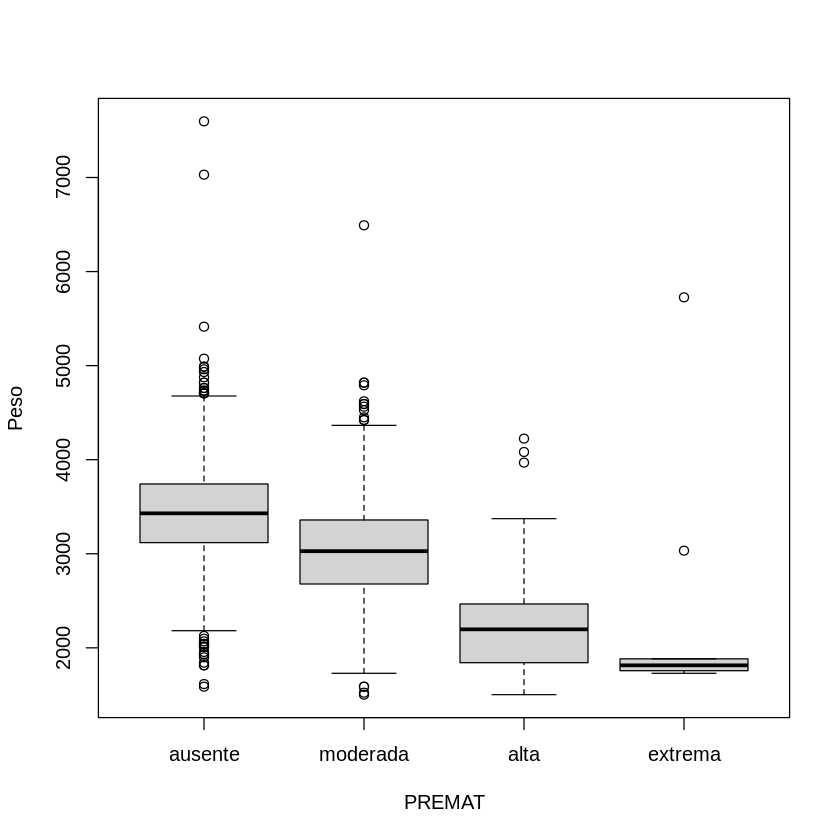

In [121]:
# Para grupo Controle:

# Tabela de frequência absoluta de mães por peso do filho(a) e Número de semanas de prematuridade.
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_controle$FPESO, df_controle$FPREMAT)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL

cat("\nTabela de frequência relativa (porcentagem): \n")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(df_controle$FPREMAT, df_controle$PESO, xlab = "PREMAT", ylab = "Peso")

Tabela de frequência absoluta: 


       
        ausente moderada alta extrema
  <2500       0      187   86      17
  >2500       0        0    0       0


Tabela de frequência relativa (porcentagem): 


       
        ausente moderada  alta extrema
  <2500    0.00    64.48 29.66    5.86
  >2500    0.00     0.00  0.00    0.00

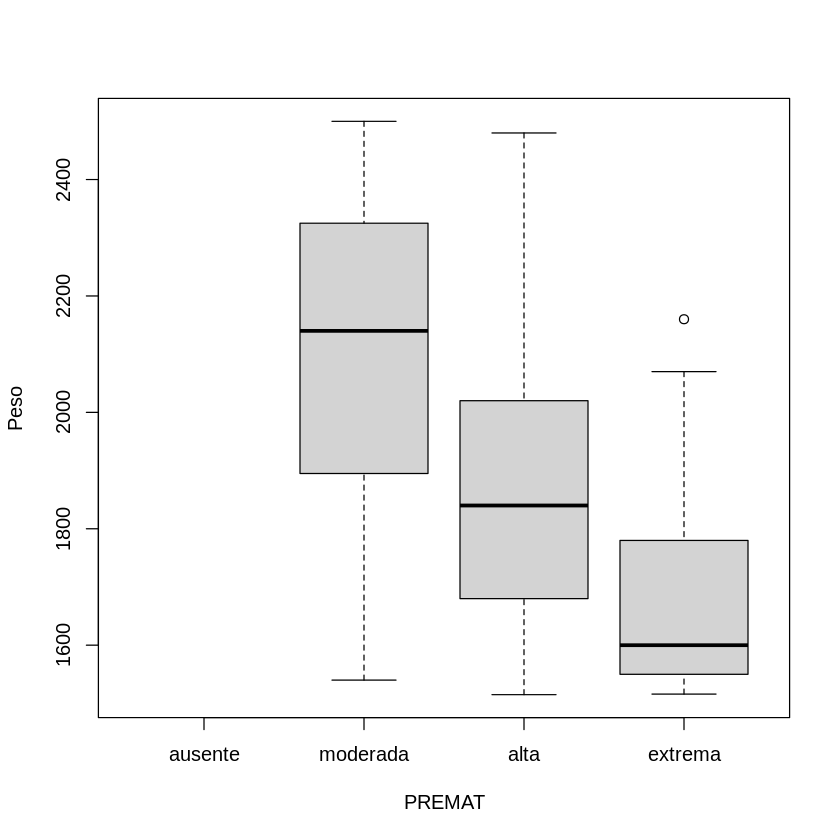

In [122]:
# Para grupo Caso:

# Tabela de frequência absoluta de mães por peso do filho(a) e Número de semanas de prematuridade.
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_caso$FPESO, df_caso$FPREMAT)
freqPQ

# Tabela de frequência relativa da variável FPESO e PREMAT
cat("\nTabela de frequência relativa (porcentagem): \n")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico

plot(df_caso$FPREMAT, df_caso$PESO, xlab = "PREMAT", ylab = "Peso")

#### D. Análise bivariada das variáveis `PREMAT` e `QI`

Tabela de frequência absoluta: 


       
        ausente moderada alta extrema
  baixa    1779      535   85      15
  media    1125      329   61      10
  alta      304      115   22       1


Tabela de frequência relativa (porcentagem): 


       
        ausente moderada  alta extrema
  baixa   40.61    12.21  1.94    0.34
  media   25.68     7.51  1.39    0.23
  alta     6.94     2.62  0.50    0.02

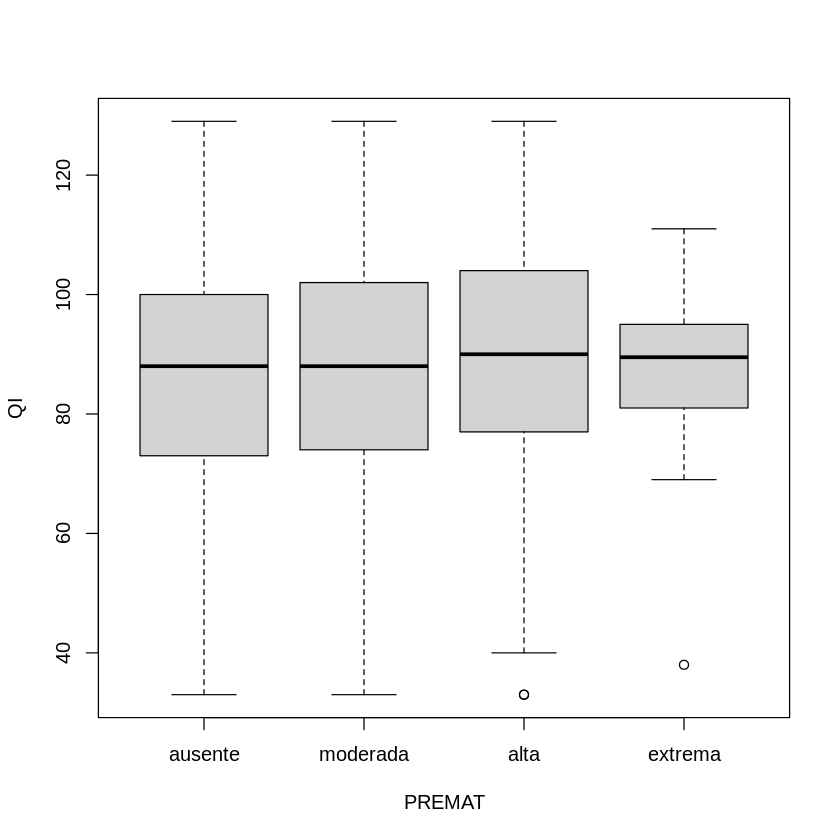

In [123]:
# Para IHDP:

# Tabela de frequência absoluta de mães por peso do filho(a) e Número de semanas de prematuridade.
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(IHDP$FQI, IHDP$FPREMAT)
freqPQ

# Tabela de frequência relativa da variável FPESO e AlCOOL
cat("\nTabela de frequência relativa (porcentagem): \n")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(IHDP$FPREMAT, IHDP$QI, xlab = "PREMAT", ylab = "QI")

Tabela de frequência absoluta: 


       
        ausente moderada alta extrema
  baixa    1779      442   46       6
  media    1125      260   28       3
  alta      304       90    8       0


Tabela de frequência relativa (porcentagem): 


       
        ausente moderada  alta extrema
  baixa   43.49    10.80  1.12    0.15
  media   27.50     6.36  0.68    0.07
  alta     7.43     2.20  0.20    0.00

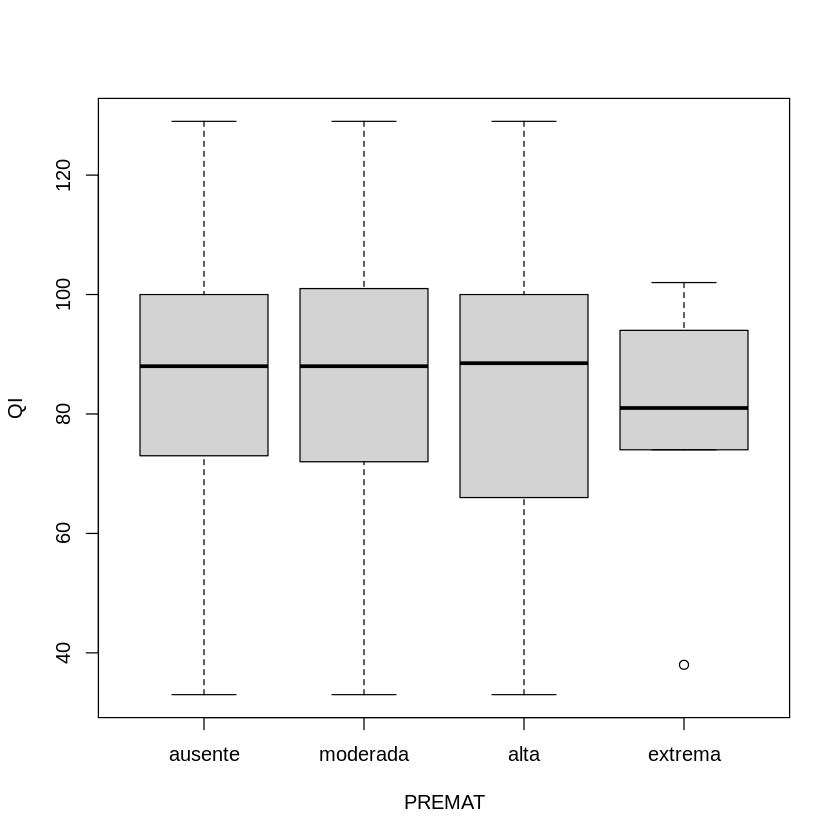

In [124]:
# Para grupo Controle:

# Tabela de frequência absoluta de mães por peso do filho(a) e Número de semanas de prematuridade.
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_controle$FQI, df_controle$FPREMAT)
freqPQ

# Tabela de frequência relativa da variável FPESO e PREMAT
cat("\nTabela de frequência relativa (porcentagem): \n")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(df_controle$FPREMAT, df_controle$QI, xlab = "PREMAT", ylab = "QI")

Tabela de frequência absoluta: 


       
        ausente moderada alta extrema
  baixa       0       93   39       9
  media       0       69   33       7
  alta        0       25   14       1


Tabela de frequência relativa (porcentagem): 


       
        ausente moderada  alta extrema
  baixa    0.00    32.07 13.45    3.10
  media    0.00    23.79 11.38    2.41
  alta     0.00     8.62  4.83    0.34

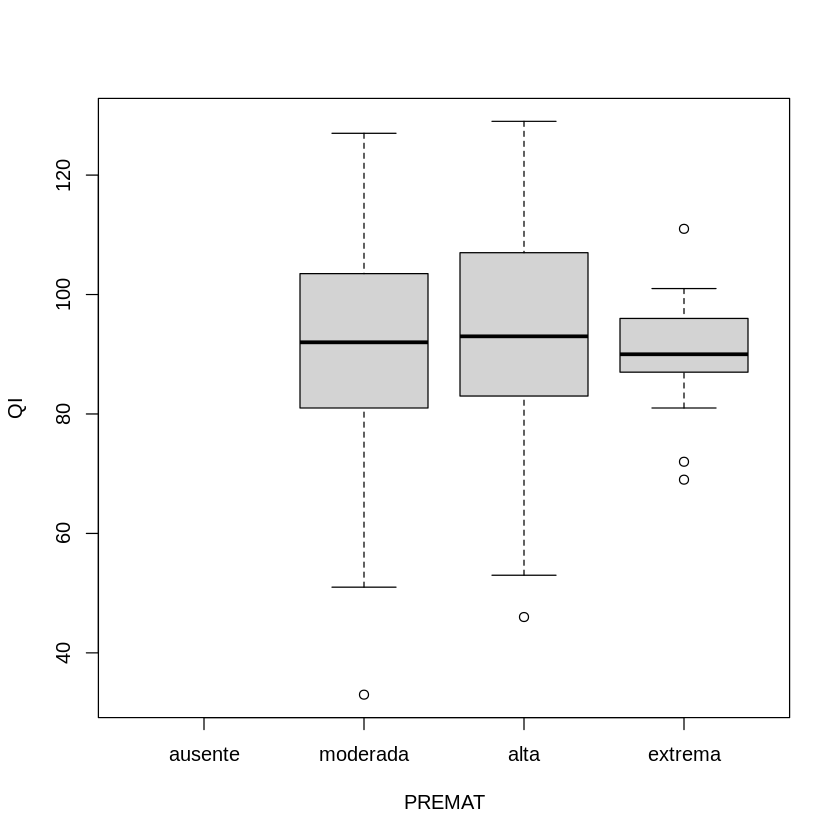

In [125]:
# Para grupo Caso:

# Tabela de frequência absoluta de mães por peso do filho(a) e Número de semanas de prematuridade.
cat("Tabela de frequência absoluta: \n")
freqPQ <- table(df_caso$FQI, df_caso$FPREMAT)
freqPQ

# Tabela de frequência relativa da variável FPESO e PREMAT
cat("\nTabela de frequência relativa (porcentagem): \n")
propPQ <- prop.table(freqPQ)
round(propPQ*100,2)

# Gráfico
plot(df_caso$FPREMAT, df_caso$QI, xlab = "PREMAT", ylab = "QI")

#### E. Análise da correlação entre `PESO` e `QI` no estrato de mães que geraram filhos com prematuridade acima de 9 semanas (`EXTREMA`)

In [126]:
# Criando um subset com Número de semanas de prematuridade Extremo.
premat_extrema <- subset(IHDP, IHDP$FPREMAT == "extrema")

# Observando o subset
head(premat_extrema)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
1,33,branca,superior,sim,sim,nao,nao,masc,nao,1559,10,31,42500,caso,111,<2500,alta,extrema
14,18,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,2070,10,24,22500,caso,93,<2500,media,extrema
22,26,negra,superior_incompleto,nao,sim,nao,nao,fem,sim,1516,10,30,12500,caso,81,<2500,baixa,extrema
42,29,branca,medio_incompleto,sim,sim,nao,nao,masc,nao,1915,10,20,17500,caso,101,<2500,media,extrema
62,23,negra,medio_incompleto,sim,sim,nao,nao,masc,sim,1740,10,20,42500,caso,90,<2500,baixa,extrema
67,27,negra,superior_incompleto,nao,sim,nao,nao,masc,nao,1750,10,44,-26232,caso,89,<2500,baixa,extrema


In [166]:
# Correlação de PESO e QI
cat("O valor da correlação foi de: \n")
cor(premat_extrema$PESO,premat_extrema$QI, method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo caso
cat("O valor da correlação p/ grupo caso foi de: \n")
cor(premat_extrema$PESO[premat_extrema$TRT == 'caso'],premat_extrema$QI[premat_extrema$TRT == 'caso'], method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo controle
cat("O valor da correlação p/ grupo controle foi de: \n")
cor(premat_extrema$PESO[premat_extrema$TRT == 'controle'],premat_extrema$QI[premat_extrema$TRT == 'controle'], method = 'pearson')
cat("\n")

cat("\nSegundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos com prematuridade acima de 9 semanas (EXTREMA) é pequena para o grupo Controle e praticamente inexistente dentro do grupo Caso e do DataFrame Original.")

O valor da correlação foi de: 


[1] 0.04600619


O valor da correlação p/ grupo caso foi de: 


[1] 0.1334949


O valor da correlação p/ grupo controle foi de: 


[1] 0.2373736



Segundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes. 
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos com prematuridade acima de 9 semanas (EXTREMA) é pequena para o grupo Controle e praticamente inexistente dentro do grupo Caso e do DataFrame Original.

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães que geraram filhos com prematuridade entre  9 e 6 semanas (`ALTA`)

In [128]:
# Criando um subset com Número de semanas de prematuridade alta.
premat_alta <- subset(IHDP, IHDP$FPREMAT == "alta")

# Observando o subset
head(premat_alta)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
4,25,negra,superior,sim,sim,nao,nao,masc,sim,1550,8,50,42500,caso,103,<2500,media,alta
7,26,branca,medio_incompleto,sim,sim,sim,nao,masc,nao,2330,9,8,17500,caso,104,<2500,media,alta
12,23,negra,medio,sim,sim,nao,nao,fem,nao,1550,7,27,5000,caso,83,<2500,baixa,alta
15,25,branca,superior,sim,sim,nao,nao,fem,nao,1786,8,71,50000,caso,107,<2500,media,alta
17,19,branca,medio_incompleto,sim,sim,sim,nao,fem,nao,2250,7,6,14974,caso,116,<2500,alta,alta
23,26,branca,medio_incompleto,sim,sim,sim,nao,masc,nao,1740,7,6,2337,caso,108,<2500,media,alta


In [129]:
# Correlação de PESO e QI
cat("O valor da correlação foi de: \n")
cor(premat_alta$PESO,premat_alta$QI, method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo caso
cat("O valor da correlação p/ grupo caso foi de: \n")
cor(premat_alta$PESO[premat_alta$TRT == 'caso'],premat_alta$QI[premat_alta$TRT == 'caso'], method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo controle
cat("O valor da correlação p/ grupo controle foi de: \n")
cor(premat_alta$PESO[premat_alta$TRT == 'controle'],premat_alta$QI[premat_alta$TRT == 'controle'], method = 'pearson')
cat("\n")

cat("\nSegundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos com prematuridade entre 9 e 6 semanas (ALTA) é pequena para o grupo Caso e praticamente inexistente dentro do grupo Controle e do DataFrame Original.")

O valor da correlação foi de: 


[1] -0.03537999


O valor da correlação p/ grupo caso foi de: 


[1] 0.2252529


O valor da correlação p/ grupo controle foi de: 


[1] 0.0167812

#### G. F. Análise da correlação entre `PESO` e `QI` no estrato de mães que geraram filhos com prematuridade entre 6 a 1 semana (`MODERADA`)

In [130]:
# Criando um subset com Número de semanas de prematuridade moderada.
premat_moderada <- subset(IHDP, IHDP$FPREMAT == "moderada")

# Observando o subset
head(premat_moderada)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
2,22,negra,medio_incompleto,nao,sim,nao,sim,masc,nao,2240,3,4,5000,caso,81,<2500,baixa,moderada
3,13,negra,medio_incompleto,nao,sim,nao,nao,masc,sim,1900,6,9,12500,caso,92,<2500,media,moderada
5,19,negra,medio_incompleto,nao,sim,sim,nao,masc,nao,2270,5,4,5000,caso,81,<2500,baixa,moderada
6,19,negra,medio,sim,sim,sim,sim,fem,sim,1550,4,13,12500,caso,94,<2500,media,moderada
8,20,branca,medio_incompleto,nao,sim,sim,sim,fem,nao,2410,3,6,11344,caso,82,<2500,baixa,moderada
9,23,branca,medio,sim,sim,nao,nao,fem,nao,1776,6,30,30000,caso,107,<2500,media,moderada


In [167]:
# Correlação de PESO e QI
cat("O valor da correlação foi de: \n")
cor(premat_moderada$PESO,premat_moderada$QI, method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo caso
cat("O valor da correlação p/ grupo caso foi de: \n")
cor(premat_moderada$PESO[premat_moderada$TRT == 'caso'],premat_moderada$QI[premat_moderada$TRT == 'caso'], method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo controle
cat("O valor da correlação p/ grupo controle foi de: \n")
cor(premat_moderada$PESO[premat_moderada$TRT == 'controle'],premat_moderada$QI[premat_moderada$TRT == 'controle'], method = 'pearson')
cat("\n")

cat("\nSegundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos com prematuridade entre 6 a 1 semana (MODERADA) é muito pequeno para todos os três dataframes ,sendo o grupo controle o único a atingir a marca de coeficiente pequeno dentro da Correlação de Pearson.")

O valor da correlação foi de: 


[1] 0.0267944


O valor da correlação p/ grupo caso foi de: 


[1] 0.09045478


O valor da correlação p/ grupo controle foi de: 


[1] 0.1099327



Segundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes. 
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos com prematuridade entre 6 a 1 semana (MODERADA) é muito pequeno para todos os três dataframes ,sendo o grupo controle o único a atingir a marca de coeficiente pequeno dentro da Correlação de Pearson.

#### H. F. Análise da correlação entre `PESO` e `QI` no estrato de mães que geraram filhos sem prematuridade (`AUSENTE`)

In [132]:
# Criando um subset com Número de semanas de prematuridade ausente.
premat_ausente <- subset(IHDP, IHDP$FPREMAT == "ausente")

# Observando o subset
head(premat_ausente)

,IDADE,ETNIA,EDU,TRAB,PRENATAL,CIGARRO,ALCOOL,GENERO,PRIMOG,PESO,PREMAT,HOSP,RENDA,TRT,QI,FPESO,FQI,FPREMAT
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>
291,19,branca,medio_incompleto,sim,sim,sim,nao,masc,sim,4592,0,8,17000,controle,97,>2500,media,ausente
292,22,branca,medio_incompleto,nao,sim,nao,sim,masc,nao,4082,-1,3,9750,controle,99,>2500,media,ausente
294,24,branca,medio,sim,sim,nao,sim,masc,nao,4139,1,4,27761,controle,33,>2500,baixa,ausente
295,27,branca,medio_incompleto,sim,sim,sim,sim,masc,nao,3679,1,7,30000,controle,105,>2500,media,ausente
296,27,branca,superior,nao,sim,sim,sim,masc,sim,3316,1,63,39902,controle,115,>2500,alta,ausente
297,24,branca,medio,sim,sim,nao,sim,fem,sim,2948,1,4,3072,controle,101,>2500,media,ausente


In [169]:
# Correlação de PESO e QI
cat("O valor da correlação foi de: \n")
cor(premat_ausente$PESO,premat_ausente$QI, method = 'pearson')
cat("\n")
# Correlação de PESO e QI p/ grupo caso
cat("O valor da correlação p/ grupo caso foi de: \n")
cor(premat_ausente$PESO[premat_ausente$TRT == 'caso'],premat_ausente$QI[premat_ausente$TRT == 'caso'], method = 'pearson')
cat("\n")

# Correlação de PESO e QI p/ grupo controle
cat("O valor da correlação p/ grupo controle foi de: \n")
cor(premat_ausente$PESO[premat_ausente$TRT == 'controle'],premat_ausente$QI[premat_ausente$TRT == 'controle'], method = 'pearson')
cat("\n")

cat("\nSegundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes.
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos sem prematuridade (AUSENTE) é considerado pequeno para o dataframe original (IHDP) e para o grupo controle, enquanto p/ o grupo Caso é inexistente, devido a ausência de bebês nessa categoria dentro do grupo.")

O valor da correlação foi de: 


[1] 0.1071518


O valor da correlação p/ grupo caso foi de: 


[1] NA


O valor da correlação p/ grupo controle foi de: 


[1] 0.1071518



Segundo o coeficiente de correlação de  Pearson  ( r ) valores entre  0,10  e  0,29  podem ser considerados pequenos; entre  0,30  e  0,49  podem ser considerados como médios; e valores entre  0,50  e  1  podem ser interpretados como grandes. 
Seja como for, quanto mais perto de  1  (independente do sinal) maior é o grau de dependência estatística linear entre as variáveis. No outro oposto, quanto mais próximo de zero, menor é a força dessa relação.

Portanto a correlação entre PESO e QI no estrato de mães que geraram filhos sem prematuridade (AUSENTE) é considerado pequeno para o dataframe original (IHDP) e para o grupo controle, enquanto p/ o grupo Caso é inexistente, devido a ausência de bebês nessa categoria dentro do grupo.

### 4.3.12. Variável `hosp` (G3)

#### A. Estatísticas básicas

#### B. Categorização das variáveis `HOSP`, `PESO` e `QI` conforme 8.1

#### C. Análise univariada das variáveis `HOSP`, `PESO` e `QI`

#### D. Análise bivariada das variáveis `HOSP`, `PESO`

#### E. Análise bivariada das variáveis `HOSP` e `QI`

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos sem hospitalização (`AUSENTE`)

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos hospitalizados abaixo de 2 semanas (`BAIXA`)

#### H. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos hospitalizados entre  2 a 4 semanas (`MEDIA`)

#### I. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos hospitalizados acima de 4 semanas (`ALTA`)

### 4.3.13. Variável `renda` (G5)

#### A. Estatísticas básicas

#### B. Categorização das variáveis `RENDA`, `PESO` e `QI` conforme 8.1

#### C. Análise univariada das variáveis `RENDA`, `PESO` e `QI`

#### D. Análise bivariada das variáveis `RENDA`, `PESO`

#### E. Análise bivariada das variáveis `RENDA` e `QI`

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com renda anual abaixo de U\$ 50.000 (`BAIXA`)

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães com renda anual entre U\$ 50.000 a U\$ 150.000 (`MEDIA`)

#### H. Análise da correlação entre `PESO` e `QI` no estrato de mães com renda anual acima de U\$ 150.000 (`ALTA`)

### 4.3.15. Variável `QI` (G7)

#### A. Estatísticas básicas

#### B. Categorização das variáveis, `PESO` e `QI` conforme 8.1

#### C. Análise univariada das variáveis `PESO` e `QI`

#### D. Análise bivariada das variáveis `PESO`, `QI`

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos com QI abaixo de 90 aos 3 anos de idade (`BAIXO`)

#### G. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos com QI entre 90 a 100 aos 3 anos de idade (`MEDIO`)

#### F. Análise da correlação entre `PESO` e `QI` no estrato de mães com filhos com QI acima de 110 aos 3 anos de idade (`ALTO`)

## 5 Conclusão
4. **Interprete** a associação entre o tratamento IHPD e o aumento do desenvolvimento de crianças prematuras de baixo peso nos diversos estratos analisados.

Podemos notar que, há um número maior no número de crianças prematuras de baixo peso no grupo que recebeu o tratamento IHPD em comparação com o grupo de controle, devido a ele ser um grupo de Caso.

No gráfico de dispersão do QI, podemos observar que, para todos os estratos, não há uma diferença clara entre os pontos que representam os indivíduos que receberam o tratamento IHPD e aqueles do grupo de controle. Isso sugere que o tratamento IHPD não parece ter uma associação significativa com o QI das crianças prematuras nos estratos analisados.

No gráfico de dispersão do peso, podemos notar que, nos estratos de prematuridade mais baixa (maior idade gestacional), há uma sobreposição considerável entre os pontos dos grupos de tratamento IHPD e controle. No entanto, nos estratos de prematuridade mais alta (menor idade gestacional), há uma tendência de que os pontos do grupo de controle estejam mais concentrados em valores mais baixos de peso em comparação com o grupo de tratamento IHPD. Isso sugere uma possível associação entre o tratamento IHPD e um aumento no peso das crianças prematuras de menor idade gestacional.